In [ ]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### importing the data 

In [ ]:
df=pd.read_csv("Jewelry_Dataset.csv")

### reading the data

In [347]:
df

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.000000e+00,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.000000e+00,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.000000e+00,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.000000e+00,102.27,1.515916e+18,NaN,red,gold,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95905,2021-12-01 09:47:37 UTC,2719016587653808559,1515966223597820877,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN
95906,2021-12-01 09:50:37 UTC,2719018098886705639,1956663830729720074,1,1.806829e+18,NaN,0.000000e+00,229.99,1.515916e+18,NaN,red,gold,NaN
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.000000e+00,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.000000e+00,83.42,1.515916e+18,NaN,white,gold,fianit


In [348]:
df.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


#### its identified that the dataset lacks columns headrs so column headers will be added from the data dictionary

In [349]:
## code to add column headers to the dataset

df.columns = [
    "Order_datetime",
    "Order_Id",
    "Purchased_product_ID",
    "SKU_quantity",
    "Category_ID",
    "Category_alias",
    "Brand_ID",
    "Price_in_USD",
    "User_ID",
    "Product_gender",
    "Main_Color",
    "Main_metal",
    "Main_gem",
]

In [350]:
df.head()

,Order_datetime,Order_Id,Purchased_product_ID,SKU_quantity,Category_ID,Category_alias,Brand_ID,Price_in_USD,User_ID,Product_gender,Main_Color,Main_metal,Main_gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [351]:
## code to know the number  of columns and rows in this dataset.
df.shape

(95910, 13)

In [352]:
## code to check for missing values in our datasrt according to the columns 
df.isnull().sum()

Order_datetime              0
Order_Id                    0
Purchased_product_ID        0
SKU_quantity                0
Category_ID              5352
Category_alias           9933
Brand_ID                 4785
Price_in_USD             5352
User_ID                  5352
Product_gender          48167
Main_Color               7660
Main_metal               5462
Main_gem                34058
dtype: int64

In [353]:
 ## to know about the datatype in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_datetime        95910 non-null  object 
 1   Order_Id              95910 non-null  int64  
 2   Purchased_product_ID  95910 non-null  int64  
 3   SKU_quantity          95910 non-null  int64  
 4   Category_ID           90558 non-null  float64
 5   Category_alias        85977 non-null  object 
 6   Brand_ID              91125 non-null  float64
 7   Price_in_USD          90558 non-null  float64
 8   User_ID               90558 non-null  float64
 9   Product_gender        47743 non-null  object 
 10  Main_Color            88250 non-null  object 
 11  Main_metal            90448 non-null  object 
 12  Main_gem              61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [354]:
# c0de to check for data duplicates
df.duplicated().sum()

2589

In [355]:
df.nunique()

Order_datetime          74504
Order_Id                74759
Purchased_product_ID     9613
SKU_quantity                1
Category_ID                25
Category_alias            218
Brand_ID                 2537
Price_in_USD             3166
User_ID                 31079
Product_gender              2
Main_Color                  5
Main_metal                  3
Main_gem                   30
dtype: int64

In [356]:
## To decribe this dataset
df.describe()

,Order_Id,Purchased_product_ID,SKU_quantity,Category_ID,Brand_ID,Price_in_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [357]:
### cardiality 
invariant_features =df.nunique()[df.nunique()==1].index.tolist()

In [358]:
invariant_features

['SKU_quantity']

In [359]:
## checking for label distribution
df["Price_in_USD"].skew()


18.95906072625981

In [360]:
df["Price_in_USD"].kurtosis()

1054.8979068506155

C:\Users\ADDIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


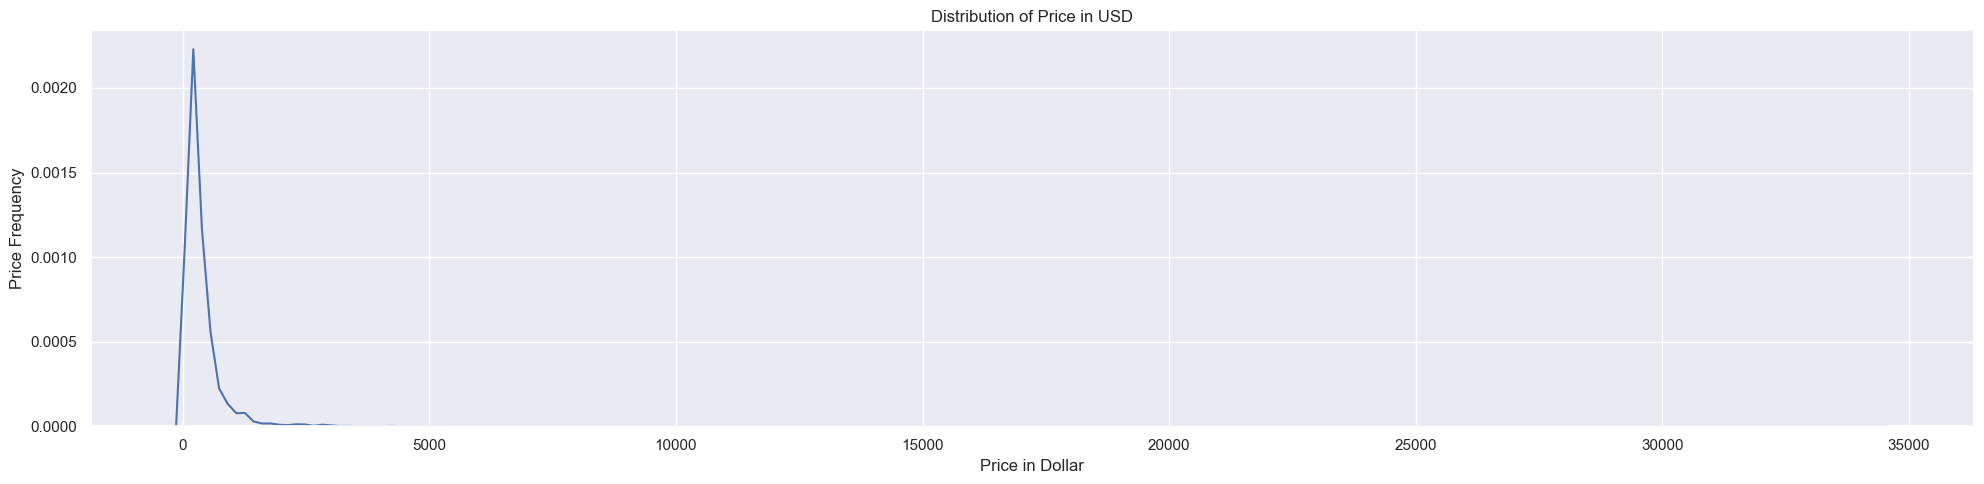

In [361]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x="Price_in_USD")
plt.xlabel("Price in Dollar")
plt.ylabel("Price Frequency")
plt.title("Distribution of Price in USD")
plt.tight_layout()
plt.show()
plt.close()


#### Gender Analysis

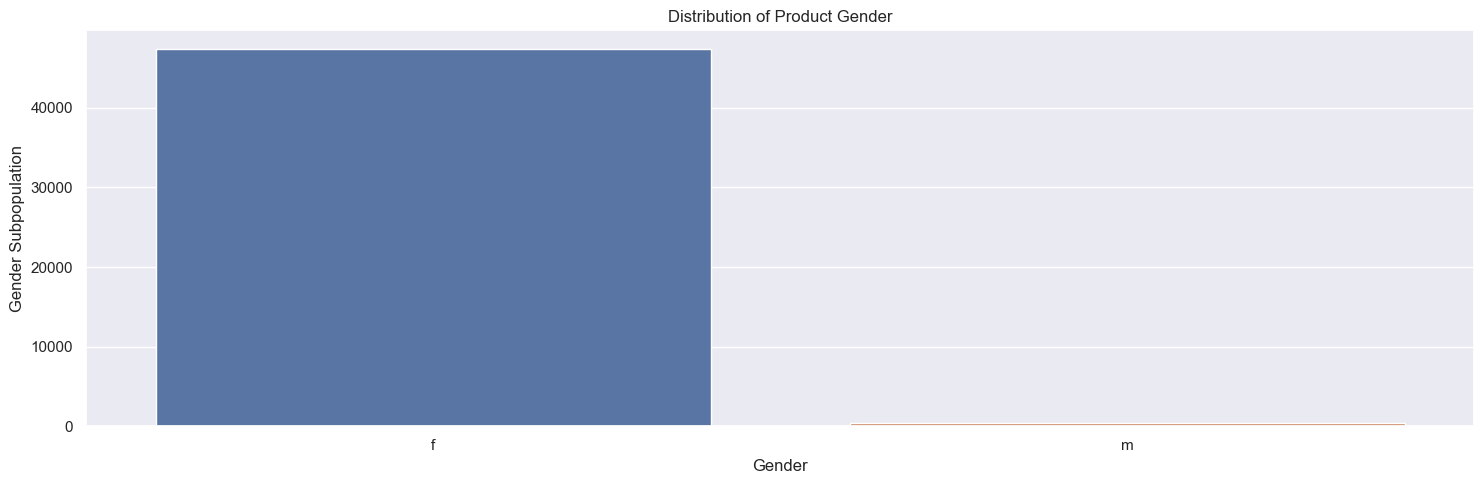

In [362]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="Product_gender")
plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")
plt.title("Distribution of Product Gender")
plt.tight_layout()
plt.show()
plt.close()

In [363]:
df["Category_ID"].value_counts()

Category_ID
1.806829e+18    29000
1.806829e+18    28286
1.806829e+18    13052
1.806829e+18     9568
1.806829e+18     6185
1.806829e+18     2356
1.806829e+18     1288
1.806829e+18      321
1.806829e+18      170
1.806829e+18      130
1.313678e+18       41
1.313678e+18       37
1.313678e+18       27
1.806829e+18       22
1.313678e+18       14
1.806829e+18       12
1.313678e+18        9
1.313678e+18        9
1.313678e+18        9
1.806829e+18        6
1.313678e+18        6
1.313678e+18        5
1.313678e+18        3
1.313678e+18        1
1.313678e+18        1
Name: count, dtype: int64

In [364]:
 df["Category_alias"].value_counts()

Category_alias
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [365]:
df["Category_alias"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

#### Extracting the main categories 

In [366]:
categories =df["Category_alias"].unique().tolist()
categories =[c for c in categories if isinstance (c, str) and "jewelry" in c]

In [367]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

#### Getting the authentic categories needed 

In [368]:
real_categories = df.loc[df["Category_alias"].isin(categories)]

In [369]:
real_categories

,Order_datetime,Order_Id,Purchased_product_ID,SKU_quantity,Category_ID,Category_alias,Brand_ID,Price_in_USD,User_ID,Product_gender,Main_Color,Main_metal,Main_gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,jewelry.earring,0.0,150.55,1.515916e+18,NaN,red,gold,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,2719009022110859402,1956663836207481431,1,1.806829e+18,jewelry.ring,0.0,145.62,1.515916e+18,NaN,red,gold,NaN
95903,2021-12-01 09:37:28 UTC,2719011482355368159,1956663847389495299,1,1.806829e+18,jewelry.earring,0.0,301.23,1.515916e+18,NaN,red,gold,amethyst
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.0,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,NaN,white,gold,fianit


In [370]:
100 *df.isnull().sum() / len(df)

Order_datetime           0.000000
Order_Id                 0.000000
Purchased_product_ID     0.000000
SKU_quantity             0.000000
Category_ID              5.580231
Category_alias          10.356584
Brand_ID                 4.989052
Price_in_USD             5.580231
User_ID                  5.580231
Product_gender          50.221041
Main_Color               7.986654
Main_metal               5.694922
Main_gem                35.510374
dtype: float64

In [371]:
100 *real_categories.isnull().sum() / len(df)

Order_datetime           0.000000
Order_Id                 0.000000
Purchased_product_ID     0.000000
SKU_quantity             0.000000
Category_ID              0.000000
Category_alias           0.000000
Brand_ID                 3.614847
Price_in_USD             0.000000
User_ID                  0.000000
Product_gender          37.617558
Main_Color               2.228131
Main_metal               0.092795
Main_gem                20.328433
dtype: float64

#### visual of categories

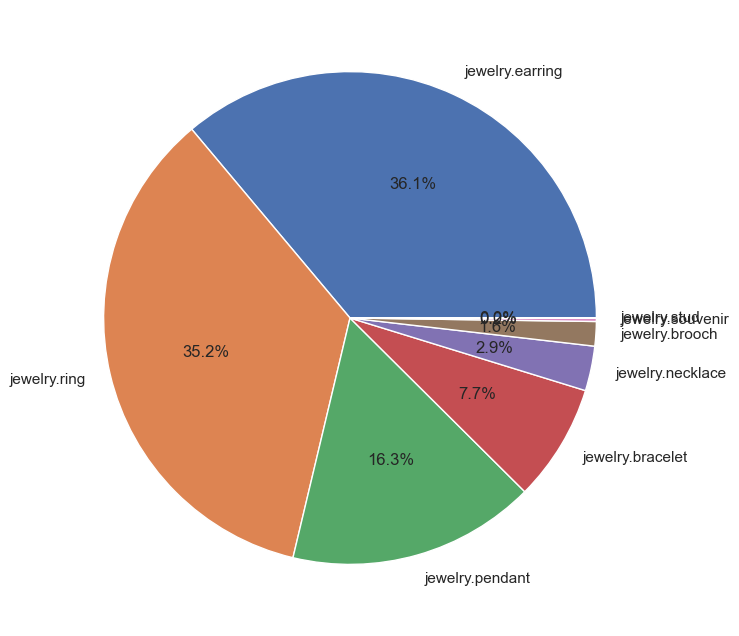

In [372]:
 
subdf = real_categories["Category_alias"].value_counts()

# Extract categories and their counts
jewelry_categories, counts = subdf.index.tolist(), subdf.values.tolist()

# Create a pie chart with percentages
plt.figure(figsize=(12, 8))
plt.pie(x=counts, labels=jewelry_categories, autopct='%1.1f%%')

# Display the plot
plt.show()
plt.close()

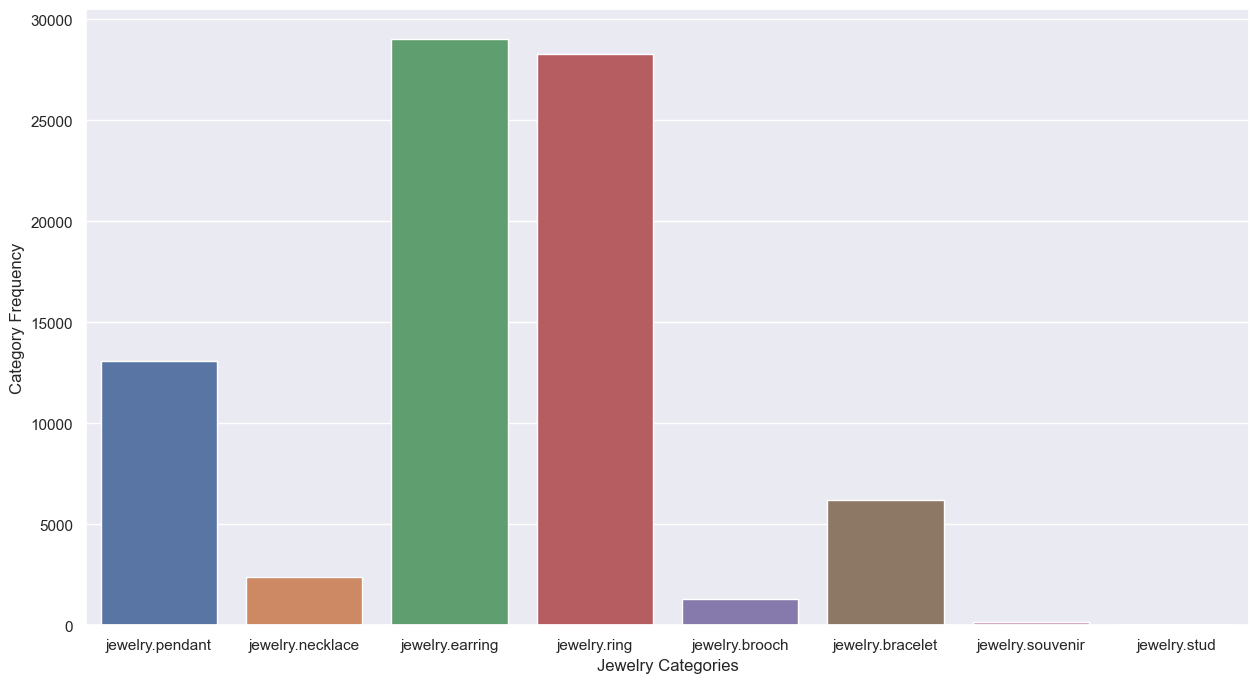

In [373]:

plt.figure(figsize=(15, 8))
sns.countplot(data=real_categories, x="Category_alias")
plt.xlabel("Jewelry Categories")
plt.ylabel("Category Frequency")

plt.show()
plt.close()

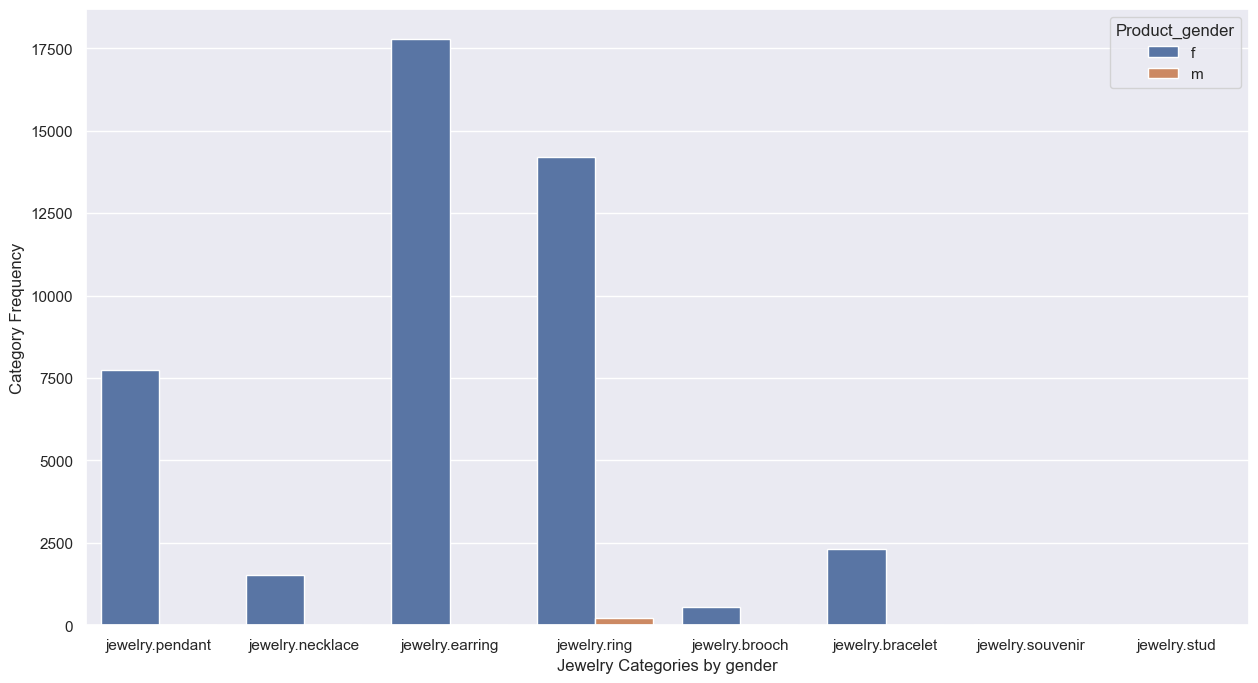

In [374]:
plt.figure(figsize=(15,8))
sns.countplot(data =real_categories, x ="Category_alias", hue ="Product_gender")

plt.xlabel("Jewelry Categories by gender")
plt.ylabel("Category Frequency")

plt.show()
plt.close()

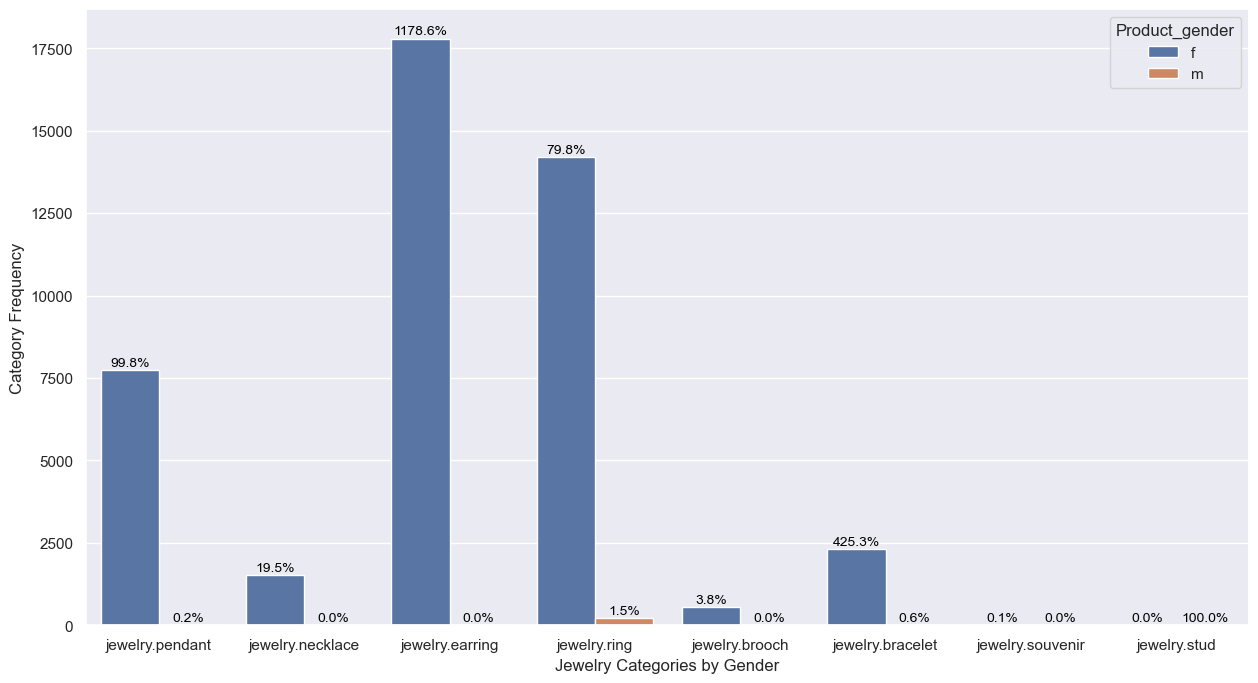

In [375]:
# Calculate counts and percentages
category_gender_counts = real_categories.groupby(['Category_alias', 'Product_gender']).size().unstack().fillna(0)
category_gender_perc = category_gender_counts.div(category_gender_counts.sum(axis=1), axis=0)

# Create a count plot
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=real_categories, x="Category_alias", hue="Product_gender")

# Annotate the bars with percentages
for p in ax.patches:
    # Extract the category and gender from the bar's x and hue coordinates
    category = p.get_x() + p.get_width() / 2
    gender = p.get_y() + p.get_height() / 2
    
    # Get the count and percentage
    height = p.get_height()
    total = category_gender_counts.loc[ax.get_xticklabels()[int(p.get_x())].get_text()].sum()
    percentage = height / total * 100
    
    # Annotate the bar
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set the labels for the x and y axes
plt.xlabel("Jewelry Categories by Gender")
plt.ylabel("Category Frequency")

# Display the plot
plt.show()
plt.close()




#### Encoding categorical columns to numerical 

In [376]:
encoded, category_code =pd.factorize(real_categories["Category_alias"])
real_categories.loc[:, "Category_alias"] =encoded

In [377]:
encoded, category_code =pd.factorize(real_categories["Product_gender"])
real_categories.loc[:, "Product_gender"] =encoded

In [378]:
encoded, category_code =pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] =encoded

In [379]:
encoded, category_code =pd.factorize(real_categories["Main_metal"])
real_categories.loc[:, "Main_metal"] =encoded

In [380]:
encoded, category_code =pd.factorize(real_categories["Main_gem"])
real_categories.loc[:, "Main_gem"] =encoded

In [381]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_datetime        80458 non-null  object 
 1   Order_Id              80458 non-null  int64  
 2   Purchased_product_ID  80458 non-null  int64  
 3   SKU_quantity          80458 non-null  int64  
 4   Category_ID           80458 non-null  float64
 5   Category_alias        80458 non-null  object 
 6   Brand_ID              76991 non-null  float64
 7   Price_in_USD          80458 non-null  float64
 8   User_ID               80458 non-null  float64
 9   Product_gender        80458 non-null  object 
 10  Main_Color            80458 non-null  object 
 11  Main_metal            80458 non-null  object 
 12  Main_gem              80458 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.6+ MB


In [382]:
real_categories.head()

,Order_datetime,Order_Id,Purchased_product_ID,SKU_quantity,Category_ID,Category_alias,Brand_ID,Price_in_USD,User_ID,Product_gender,Main_Color,Main_metal,Main_gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


#### correlation

In [383]:
correlations =real_categories.drop(labels=["Order_datetime", "User_ID", "Order_Id","Purchased_product_ID"], axis=1).corr(method="spearman")

In [384]:
correlations 

,SKU_quantity,Category_ID,Category_alias,Brand_ID,Price_in_USD,Product_gender,Main_Color,Main_metal,Main_gem
SKU_quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category_alias,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_in_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Product_gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


C:\Users\ADDIS\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


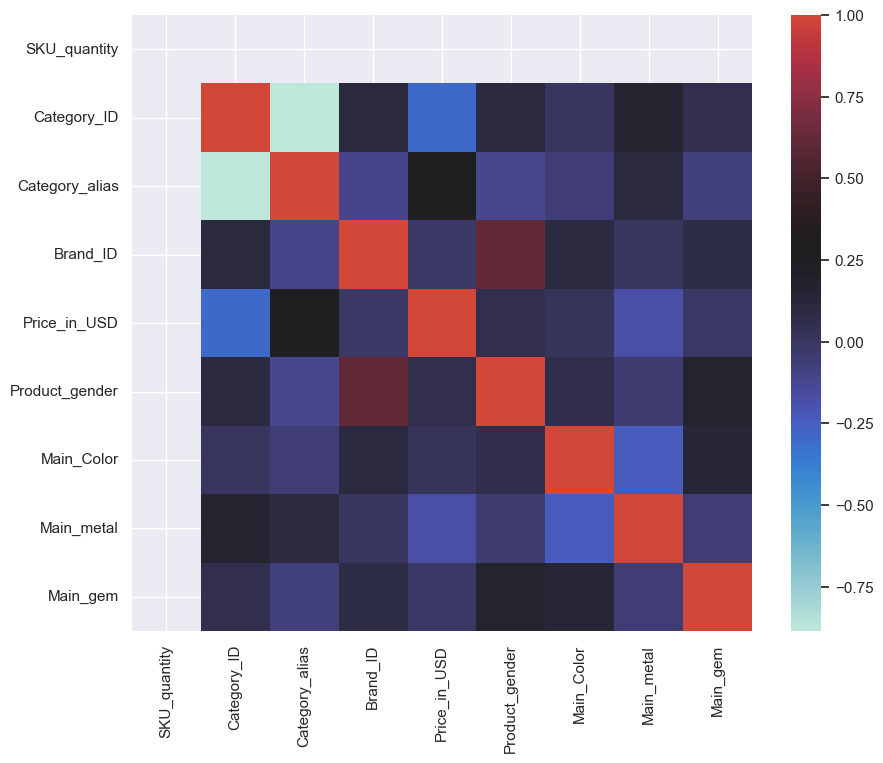

In [385]:
plt.figure(figsize =(10,8))
sns.heatmap(correlations, annot = True, center = .3)

plt.show(); plt.close()

In [386]:
upper =1
lower = .2

In [387]:
# To see how the colums are coerrelated with the target column.

correlated_column={
    column: correlations[(correlations[column] > lower) & (upper >correlations[column])].index.tolist()
    for column in correlations.columns
}

In [388]:
correlated_column


{'SKU_quantity': [],
 'Category_ID': [],
 'Category_alias': ['Price_in_USD'],
 'Brand_ID': ['Product_gender'],
 'Price_in_USD': ['Category_alias'],
 'Product_gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_metal': [],
 'Main_gem': []}

#### Eliminating Columns not needed for the project

In [389]:
columns_to_eliminate = [
    "SKU_quantity",
    "Category_ID",
    "Brand_ID",
    "Order_Id",
    "User_ID"
    
    
]
    
    

In [390]:
df.drop(labels = columns_to_eliminate, axis= 1, inplace= True)

In [391]:
df.columns




Index(['Order_datetime', 'Purchased_product_ID', 'Category_alias',
       'Price_in_USD', 'Product_gender', 'Main_Color', 'Main_metal',
       'Main_gem'],
      dtype='object')

In [392]:
df.shape

(95910, 8)

In [393]:
df.drop(labels = "Order_datetime", axis= 1, inplace= True)

In [394]:
df.head()

,Purchased_product_ID,Category_alias,Price_in_USD,Product_gender,Main_Color,Main_metal,Main_gem
0,1806829193678291446,NaN,212.14,NaN,yellow,gold,NaN
1,1842214461889315556,jewelry.pendant,54.66,f,white,gold,sapphire
2,1835566849434059453,jewelry.pendant,88.90,f,red,gold,diamond
3,1873936840742928865,jewelry.necklace,417.67,NaN,red,gold,amethyst
4,1835566854827934449,jewelry.earring,102.27,NaN,red,gold,NaN


In [395]:
df.shape




(95910, 7)

In [396]:
df=df.loc[df["Category_alias"].isin(categories), :]

In [397]:
df.shape

(80458, 7)

#### splitting the dataset

In [398]:
from sklearn.model_selection import train_test_split

In [399]:
X, y =df.drop(["Price_in_USD"], axis =1), df["Price_in_USD"]

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1)

#### Data Modelling 

In [401]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [402]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

def generate_pipeline(model, column_indices, categorical_indices, fill_missing=True, one_hot=True, label_encode=False):
    first_transformer = ColumnTransformer(
        transformers=[ 
            ("imputer", SimpleImputer(strategy="most_frequent"), column_indices)
        ],
        remainder="passthrough",
        sparse_threshold=0
    )

    second_transformer = ColumnTransformer(
        transformers=[
            ("onehot", OneHotEncoder(), categorical_indices)
        ],
        remainder="passthrough",
        sparse_threshold=0
    )

    third_transformer = ColumnTransformer(
        transformers=[
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder="passthrough",
        sparse_threshold=0
    )
    
    steps = []
    if fill_missing:
        steps.append(("first", first_transformer))
        
    if label_encode:
        steps.append(("third", third_transformer))
        
    if one_hot:
        steps.append(("secons", second_transformer))
        
    steps.append(("model", model))
    
    model_pipe =Pipeline(steps = steps)
    
    return model_pipe


In [403]:
## GPT1



from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.compose import TransformedTargetRegressor

def generate_pipeline(model, column_indices, categorical_indices, fill_missing=True, one_hot=True, label_encode=False):
    transformers = []

    # Step 1: Imputation
    if fill_missing:
        first_transformer = ColumnTransformer(
            transformers=[ 
                ("imputer", SimpleImputer(strategy="most_frequent"), column_indices)
            ],
            remainder="passthrough",
            sparse_threshold=0
        )
        transformers.append(("imputer", first_transformer))

    # Step 2: Encoding
    if one_hot:
        second_transformer = ColumnTransformer(
            transformers=[
                ("onehot", OneHotEncoder(), categorical_indices)
            ],
            remainder="passthrough",
            sparse_threshold=0
        )
        transformers.append(("onehot", second_transformer))
    elif label_encode:
        third_transformer = ColumnTransformer(
            transformers=[
                ("ordinal", OrdinalEncoder(), categorical_indices)
            ],
            remainder="passthrough",
            sparse_threshold=0
        )
        transformers.append(("ordinal", third_transformer))

    # Combine transformers
    preprocessing = Pipeline(transformers)

    # Step 3: Add model to pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('model', model)
    ])

    return pipeline

In [404]:
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features =[c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]

In [405]:
categorical_indices

[0, 1, 2, 3, 4, 5]

#### catboost pipelne

In [406]:
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function="RMSE", iterations=10000, learning_rate=0.1, one_hot_max_size=2),
    column_indices,
    categorical_indices,
    fill_missing=False, one_hot=False, label_encode=True
)


In [407]:
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing=False, one_hot=False, label_encode=True
)

In [408]:
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential" , n_estimators= 10000, learning_rate=0.1),
    column_indices,
    categorical_indices,
    fill_missing=False, one_hot=False, label_encode=True
)

In [409]:
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion ="friedman_mse", n_estimators= 10000, bootstrap=True),
    column_indices,
    categorical_indices,
    fill_missing=False, one_hot=False, label_encode=True
)

In [410]:
from sklearn.preprocessing import PowerTransformer

In [411]:
cat_pipe = generate_pipeline(cat_pipe, column_indices, categorical_indices, fill_missing=True, one_hot=False, label_encode=True)
lin_pipe = generate_pipeline(lin_pipe, column_indices, categorical_indices, fill_missing=True, one_hot=False, label_encode=True)
ada_pipe = generate_pipeline(ada_pipe, column_indices, categorical_indices, fill_missing=True, one_hot=False, label_encode=True)
extra_pipe = generate_pipeline(extra_pipe, column_indices, categorical_indices, fill_missing=True, one_hot=False, label_encode=True)

In [412]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

cat_pipe = TransformedTargetRegressor(regressor=cat_pipe, transformer=PowerTransformer(method="box-cox"))
lin_pipe = TransformedTargetRegressor(regressor=lin_pipe, transformer=PowerTransformer(method="box-cox"))
ada_pipe = TransformedTargetRegressor(regressor=ada_pipe, transformer=PowerTransformer(method="box-cox"))
extra_pipe = TransformedTargetRegressor(regressor=extra_pipe, transformer=PowerTransformer(method="box-cox"))


In [413]:
cat_pipe.fit(X_train,y_train)

0:	learn: 0.9673739	total: 30.6ms	remaining: 5m 6s
1:	learn: 0.9388381	total: 46.5ms	remaining: 3m 52s
2:	learn: 0.9150308	total: 63.7ms	remaining: 3m 32s
3:	learn: 0.8963840	total: 78.6ms	remaining: 3m 16s
4:	learn: 0.8798931	total: 95.4ms	remaining: 3m 10s
5:	learn: 0.8689144	total: 107ms	remaining: 2m 58s
6:	learn: 0.8569576	total: 125ms	remaining: 2m 59s
7:	learn: 0.8489000	total: 138ms	remaining: 2m 51s
8:	learn: 0.8419933	total: 154ms	remaining: 2m 50s
9:	learn: 0.8334544	total: 166ms	remaining: 2m 46s
10:	learn: 0.8267622	total: 180ms	remaining: 2m 43s
11:	learn: 0.8210817	total: 193ms	remaining: 2m 40s
12:	learn: 0.8173886	total: 215ms	remaining: 2m 45s
13:	learn: 0.8132830	total: 233ms	remaining: 2m 45s
14:	learn: 0.8101559	total: 264ms	remaining: 2m 55s
15:	learn: 0.8076410	total: 276ms	remaining: 2m 52s
16:	learn: 0.8041731	total: 294ms	remaining: 2m 52s
17:	learn: 0.8018289	total: 306ms	remaining: 2m 49s
18:	learn: 0.7996069	total: 320ms	remaining: 2m 47s
19:	learn: 0.79701

176:	learn: 0.6944327	total: 2.14s	remaining: 1m 58s
177:	learn: 0.6942384	total: 2.15s	remaining: 1m 58s
178:	learn: 0.6939811	total: 2.16s	remaining: 1m 58s
179:	learn: 0.6938222	total: 2.17s	remaining: 1m 58s
180:	learn: 0.6932962	total: 2.17s	remaining: 1m 57s
181:	learn: 0.6930463	total: 2.18s	remaining: 1m 57s
182:	learn: 0.6925192	total: 2.19s	remaining: 1m 57s
183:	learn: 0.6922306	total: 2.2s	remaining: 1m 57s
184:	learn: 0.6917423	total: 2.21s	remaining: 1m 57s
185:	learn: 0.6912355	total: 2.21s	remaining: 1m 56s
186:	learn: 0.6909198	total: 2.22s	remaining: 1m 56s
187:	learn: 0.6905159	total: 2.23s	remaining: 1m 56s
188:	learn: 0.6900883	total: 2.24s	remaining: 1m 56s
189:	learn: 0.6897105	total: 2.25s	remaining: 1m 56s
190:	learn: 0.6892783	total: 2.25s	remaining: 1m 55s
191:	learn: 0.6891485	total: 2.26s	remaining: 1m 55s
192:	learn: 0.6886110	total: 2.27s	remaining: 1m 55s
193:	learn: 0.6881786	total: 2.28s	remaining: 1m 55s
194:	learn: 0.6878451	total: 2.28s	remaining: 1

354:	learn: 0.6420627	total: 3.57s	remaining: 1m 37s
355:	learn: 0.6418007	total: 3.58s	remaining: 1m 37s
356:	learn: 0.6414975	total: 3.59s	remaining: 1m 37s
357:	learn: 0.6413059	total: 3.6s	remaining: 1m 37s
358:	learn: 0.6411364	total: 3.61s	remaining: 1m 36s
359:	learn: 0.6409089	total: 3.62s	remaining: 1m 36s
360:	learn: 0.6407039	total: 3.62s	remaining: 1m 36s
361:	learn: 0.6403865	total: 3.63s	remaining: 1m 36s
362:	learn: 0.6402276	total: 3.64s	remaining: 1m 36s
363:	learn: 0.6400166	total: 3.65s	remaining: 1m 36s
364:	learn: 0.6396147	total: 3.65s	remaining: 1m 36s
365:	learn: 0.6392707	total: 3.66s	remaining: 1m 36s
366:	learn: 0.6390750	total: 3.67s	remaining: 1m 36s
367:	learn: 0.6387868	total: 3.68s	remaining: 1m 36s
368:	learn: 0.6385976	total: 3.69s	remaining: 1m 36s
369:	learn: 0.6382604	total: 3.7s	remaining: 1m 36s
370:	learn: 0.6379542	total: 3.71s	remaining: 1m 36s
371:	learn: 0.6377180	total: 3.71s	remaining: 1m 36s
372:	learn: 0.6376253	total: 3.72s	remaining: 1m

517:	learn: 0.6090921	total: 5.01s	remaining: 1m 31s
518:	learn: 0.6089431	total: 5.02s	remaining: 1m 31s
519:	learn: 0.6088541	total: 5.03s	remaining: 1m 31s
520:	learn: 0.6086409	total: 5.04s	remaining: 1m 31s
521:	learn: 0.6085847	total: 5.05s	remaining: 1m 31s
522:	learn: 0.6085076	total: 5.06s	remaining: 1m 31s
523:	learn: 0.6082311	total: 5.07s	remaining: 1m 31s
524:	learn: 0.6080159	total: 5.08s	remaining: 1m 31s
525:	learn: 0.6079173	total: 5.09s	remaining: 1m 31s
526:	learn: 0.6077440	total: 5.1s	remaining: 1m 31s
527:	learn: 0.6076515	total: 5.11s	remaining: 1m 31s
528:	learn: 0.6075185	total: 5.12s	remaining: 1m 31s
529:	learn: 0.6074603	total: 5.12s	remaining: 1m 31s
530:	learn: 0.6071059	total: 5.13s	remaining: 1m 31s
531:	learn: 0.6068981	total: 5.14s	remaining: 1m 31s
532:	learn: 0.6067635	total: 5.15s	remaining: 1m 31s
533:	learn: 0.6064050	total: 5.16s	remaining: 1m 31s
534:	learn: 0.6063298	total: 5.17s	remaining: 1m 31s
535:	learn: 0.6062147	total: 5.17s	remaining: 1

681:	learn: 0.5835754	total: 6.48s	remaining: 1m 28s
682:	learn: 0.5834407	total: 6.49s	remaining: 1m 28s
683:	learn: 0.5833720	total: 6.5s	remaining: 1m 28s
684:	learn: 0.5832142	total: 6.5s	remaining: 1m 28s
685:	learn: 0.5831658	total: 6.51s	remaining: 1m 28s
686:	learn: 0.5829893	total: 6.52s	remaining: 1m 28s
687:	learn: 0.5828360	total: 6.53s	remaining: 1m 28s
688:	learn: 0.5825438	total: 6.54s	remaining: 1m 28s
689:	learn: 0.5823969	total: 6.55s	remaining: 1m 28s
690:	learn: 0.5822500	total: 6.56s	remaining: 1m 28s
691:	learn: 0.5821240	total: 6.56s	remaining: 1m 28s
692:	learn: 0.5820753	total: 6.57s	remaining: 1m 28s
693:	learn: 0.5820215	total: 6.58s	remaining: 1m 28s
694:	learn: 0.5819411	total: 6.59s	remaining: 1m 28s
695:	learn: 0.5817850	total: 6.59s	remaining: 1m 28s
696:	learn: 0.5816515	total: 6.6s	remaining: 1m 28s
697:	learn: 0.5815111	total: 6.61s	remaining: 1m 28s
698:	learn: 0.5813887	total: 6.62s	remaining: 1m 28s
699:	learn: 0.5812393	total: 6.63s	remaining: 1m 

842:	learn: 0.5634361	total: 7.92s	remaining: 1m 26s
843:	learn: 0.5633998	total: 7.93s	remaining: 1m 26s
844:	learn: 0.5633521	total: 7.94s	remaining: 1m 26s
845:	learn: 0.5632550	total: 7.95s	remaining: 1m 26s
846:	learn: 0.5632272	total: 7.96s	remaining: 1m 25s
847:	learn: 0.5630510	total: 7.97s	remaining: 1m 26s
848:	learn: 0.5628673	total: 7.98s	remaining: 1m 26s
849:	learn: 0.5626777	total: 7.99s	remaining: 1m 25s
850:	learn: 0.5626261	total: 8s	remaining: 1m 25s
851:	learn: 0.5624129	total: 8.01s	remaining: 1m 25s
852:	learn: 0.5623253	total: 8.02s	remaining: 1m 25s
853:	learn: 0.5622382	total: 8.02s	remaining: 1m 25s
854:	learn: 0.5621759	total: 8.03s	remaining: 1m 25s
855:	learn: 0.5619592	total: 8.04s	remaining: 1m 25s
856:	learn: 0.5618790	total: 8.05s	remaining: 1m 25s
857:	learn: 0.5617161	total: 8.06s	remaining: 1m 25s
858:	learn: 0.5616303	total: 8.06s	remaining: 1m 25s
859:	learn: 0.5615805	total: 8.07s	remaining: 1m 25s
860:	learn: 0.5614291	total: 8.08s	remaining: 1m 

1006:	learn: 0.5463919	total: 9.41s	remaining: 1m 24s
1007:	learn: 0.5463556	total: 9.42s	remaining: 1m 24s
1008:	learn: 0.5461761	total: 9.43s	remaining: 1m 24s
1009:	learn: 0.5461105	total: 9.44s	remaining: 1m 24s
1010:	learn: 0.5460605	total: 9.45s	remaining: 1m 24s
1011:	learn: 0.5460310	total: 9.46s	remaining: 1m 23s
1012:	learn: 0.5459492	total: 9.46s	remaining: 1m 23s
1013:	learn: 0.5458370	total: 9.47s	remaining: 1m 23s
1014:	learn: 0.5457661	total: 9.48s	remaining: 1m 23s
1015:	learn: 0.5456377	total: 9.49s	remaining: 1m 23s
1016:	learn: 0.5455261	total: 9.5s	remaining: 1m 23s
1017:	learn: 0.5454686	total: 9.51s	remaining: 1m 23s
1018:	learn: 0.5454106	total: 9.51s	remaining: 1m 23s
1019:	learn: 0.5453207	total: 9.52s	remaining: 1m 23s
1020:	learn: 0.5451984	total: 9.53s	remaining: 1m 23s
1021:	learn: 0.5451469	total: 9.54s	remaining: 1m 23s
1022:	learn: 0.5451056	total: 9.54s	remaining: 1m 23s
1023:	learn: 0.5450425	total: 9.55s	remaining: 1m 23s
1024:	learn: 0.5449630	total:

1166:	learn: 0.5331795	total: 10.9s	remaining: 1m 22s
1167:	learn: 0.5329519	total: 10.9s	remaining: 1m 22s
1168:	learn: 0.5328913	total: 10.9s	remaining: 1m 22s
1169:	learn: 0.5328265	total: 10.9s	remaining: 1m 22s
1170:	learn: 0.5327694	total: 10.9s	remaining: 1m 22s
1171:	learn: 0.5327352	total: 10.9s	remaining: 1m 22s
1172:	learn: 0.5327051	total: 10.9s	remaining: 1m 22s
1173:	learn: 0.5326812	total: 10.9s	remaining: 1m 22s
1174:	learn: 0.5325445	total: 10.9s	remaining: 1m 22s
1175:	learn: 0.5323746	total: 11s	remaining: 1m 22s
1176:	learn: 0.5323359	total: 11s	remaining: 1m 22s
1177:	learn: 0.5322892	total: 11s	remaining: 1m 22s
1178:	learn: 0.5322636	total: 11s	remaining: 1m 22s
1179:	learn: 0.5322286	total: 11s	remaining: 1m 22s
1180:	learn: 0.5322148	total: 11s	remaining: 1m 22s
1181:	learn: 0.5321052	total: 11s	remaining: 1m 22s
1182:	learn: 0.5320459	total: 11s	remaining: 1m 22s
1183:	learn: 0.5319277	total: 11s	remaining: 1m 22s
1184:	learn: 0.5318781	total: 11.1s	remaining:

1325:	learn: 0.5220792	total: 12.3s	remaining: 1m 20s
1326:	learn: 0.5220430	total: 12.3s	remaining: 1m 20s
1327:	learn: 0.5219638	total: 12.4s	remaining: 1m 20s
1328:	learn: 0.5218520	total: 12.4s	remaining: 1m 20s
1329:	learn: 0.5218074	total: 12.4s	remaining: 1m 20s
1330:	learn: 0.5217581	total: 12.4s	remaining: 1m 20s
1331:	learn: 0.5214952	total: 12.4s	remaining: 1m 20s
1332:	learn: 0.5214469	total: 12.4s	remaining: 1m 20s
1333:	learn: 0.5213806	total: 12.4s	remaining: 1m 20s
1334:	learn: 0.5213061	total: 12.4s	remaining: 1m 20s
1335:	learn: 0.5212484	total: 12.4s	remaining: 1m 20s
1336:	learn: 0.5211695	total: 12.4s	remaining: 1m 20s
1337:	learn: 0.5210955	total: 12.5s	remaining: 1m 20s
1338:	learn: 0.5210531	total: 12.5s	remaining: 1m 20s
1339:	learn: 0.5209763	total: 12.5s	remaining: 1m 20s
1340:	learn: 0.5208931	total: 12.5s	remaining: 1m 20s
1341:	learn: 0.5208448	total: 12.5s	remaining: 1m 20s
1342:	learn: 0.5208037	total: 12.5s	remaining: 1m 20s
1343:	learn: 0.5206969	total

1489:	learn: 0.5122563	total: 13.8s	remaining: 1m 18s
1490:	learn: 0.5121708	total: 13.8s	remaining: 1m 18s
1491:	learn: 0.5121294	total: 13.8s	remaining: 1m 18s
1492:	learn: 0.5119386	total: 13.9s	remaining: 1m 18s
1493:	learn: 0.5118470	total: 13.9s	remaining: 1m 18s
1494:	learn: 0.5117760	total: 13.9s	remaining: 1m 18s
1495:	learn: 0.5117501	total: 13.9s	remaining: 1m 18s
1496:	learn: 0.5117248	total: 13.9s	remaining: 1m 18s
1497:	learn: 0.5116941	total: 13.9s	remaining: 1m 18s
1498:	learn: 0.5116400	total: 13.9s	remaining: 1m 18s
1499:	learn: 0.5115739	total: 13.9s	remaining: 1m 18s
1500:	learn: 0.5114660	total: 13.9s	remaining: 1m 18s
1501:	learn: 0.5113605	total: 13.9s	remaining: 1m 18s
1502:	learn: 0.5112646	total: 13.9s	remaining: 1m 18s
1503:	learn: 0.5112052	total: 13.9s	remaining: 1m 18s
1504:	learn: 0.5110631	total: 14s	remaining: 1m 18s
1505:	learn: 0.5110374	total: 14s	remaining: 1m 18s
1506:	learn: 0.5109968	total: 14s	remaining: 1m 18s
1507:	learn: 0.5109145	total: 14s	

1648:	learn: 0.5039499	total: 15.8s	remaining: 1m 19s
1649:	learn: 0.5039184	total: 15.8s	remaining: 1m 19s
1650:	learn: 0.5038823	total: 15.8s	remaining: 1m 19s
1651:	learn: 0.5038477	total: 15.8s	remaining: 1m 19s
1652:	learn: 0.5038085	total: 15.8s	remaining: 1m 19s
1653:	learn: 0.5038025	total: 15.8s	remaining: 1m 19s
1654:	learn: 0.5037545	total: 15.8s	remaining: 1m 19s
1655:	learn: 0.5037056	total: 15.9s	remaining: 1m 19s
1656:	learn: 0.5036434	total: 15.9s	remaining: 1m 19s
1657:	learn: 0.5035992	total: 15.9s	remaining: 1m 19s
1658:	learn: 0.5035511	total: 15.9s	remaining: 1m 19s
1659:	learn: 0.5034501	total: 15.9s	remaining: 1m 19s
1660:	learn: 0.5034216	total: 15.9s	remaining: 1m 19s
1661:	learn: 0.5033809	total: 15.9s	remaining: 1m 19s
1662:	learn: 0.5033513	total: 15.9s	remaining: 1m 19s
1663:	learn: 0.5032712	total: 15.9s	remaining: 1m 19s
1664:	learn: 0.5032380	total: 16s	remaining: 1m 19s
1665:	learn: 0.5031884	total: 16s	remaining: 1m 19s
1666:	learn: 0.5031037	total: 16

1809:	learn: 0.4972147	total: 17.6s	remaining: 1m 19s
1810:	learn: 0.4971278	total: 17.6s	remaining: 1m 19s
1811:	learn: 0.4970934	total: 17.6s	remaining: 1m 19s
1812:	learn: 0.4970693	total: 17.7s	remaining: 1m 19s
1813:	learn: 0.4970022	total: 17.7s	remaining: 1m 19s
1814:	learn: 0.4969761	total: 17.7s	remaining: 1m 19s
1815:	learn: 0.4968840	total: 17.7s	remaining: 1m 19s
1816:	learn: 0.4968546	total: 17.7s	remaining: 1m 19s
1817:	learn: 0.4968448	total: 17.7s	remaining: 1m 19s
1818:	learn: 0.4968274	total: 17.7s	remaining: 1m 19s
1819:	learn: 0.4967856	total: 17.7s	remaining: 1m 19s
1820:	learn: 0.4967664	total: 17.7s	remaining: 1m 19s
1821:	learn: 0.4967508	total: 17.7s	remaining: 1m 19s
1822:	learn: 0.4967327	total: 17.7s	remaining: 1m 19s
1823:	learn: 0.4967121	total: 17.8s	remaining: 1m 19s
1824:	learn: 0.4966134	total: 17.8s	remaining: 1m 19s
1825:	learn: 0.4965885	total: 17.8s	remaining: 1m 19s
1826:	learn: 0.4965505	total: 17.8s	remaining: 1m 19s
1827:	learn: 0.4965305	total

1971:	learn: 0.4915505	total: 19.3s	remaining: 1m 18s
1972:	learn: 0.4915148	total: 19.3s	remaining: 1m 18s
1973:	learn: 0.4914916	total: 19.4s	remaining: 1m 18s
1974:	learn: 0.4914471	total: 19.4s	remaining: 1m 18s
1975:	learn: 0.4913697	total: 19.4s	remaining: 1m 18s
1976:	learn: 0.4912978	total: 19.4s	remaining: 1m 18s
1977:	learn: 0.4912707	total: 19.4s	remaining: 1m 18s
1978:	learn: 0.4912557	total: 19.5s	remaining: 1m 18s
1979:	learn: 0.4912318	total: 19.5s	remaining: 1m 18s
1980:	learn: 0.4912174	total: 19.5s	remaining: 1m 18s
1981:	learn: 0.4912031	total: 19.5s	remaining: 1m 18s
1982:	learn: 0.4911585	total: 19.5s	remaining: 1m 18s
1983:	learn: 0.4911100	total: 19.5s	remaining: 1m 18s
1984:	learn: 0.4910742	total: 19.5s	remaining: 1m 18s
1985:	learn: 0.4910533	total: 19.5s	remaining: 1m 18s
1986:	learn: 0.4910111	total: 19.6s	remaining: 1m 18s
1987:	learn: 0.4909666	total: 19.6s	remaining: 1m 18s
1988:	learn: 0.4909303	total: 19.6s	remaining: 1m 18s
1989:	learn: 0.4908966	total

2126:	learn: 0.4859457	total: 21.2s	remaining: 1m 18s
2127:	learn: 0.4858984	total: 21.2s	remaining: 1m 18s
2128:	learn: 0.4858606	total: 21.2s	remaining: 1m 18s
2129:	learn: 0.4858492	total: 21.2s	remaining: 1m 18s
2130:	learn: 0.4858060	total: 21.2s	remaining: 1m 18s
2131:	learn: 0.4857688	total: 21.2s	remaining: 1m 18s
2132:	learn: 0.4857445	total: 21.2s	remaining: 1m 18s
2133:	learn: 0.4857278	total: 21.2s	remaining: 1m 18s
2134:	learn: 0.4856937	total: 21.2s	remaining: 1m 18s
2135:	learn: 0.4856137	total: 21.3s	remaining: 1m 18s
2136:	learn: 0.4854901	total: 21.3s	remaining: 1m 18s
2137:	learn: 0.4854574	total: 21.3s	remaining: 1m 18s
2138:	learn: 0.4854238	total: 21.3s	remaining: 1m 18s
2139:	learn: 0.4854150	total: 21.3s	remaining: 1m 18s
2140:	learn: 0.4854007	total: 21.3s	remaining: 1m 18s
2141:	learn: 0.4853775	total: 21.3s	remaining: 1m 18s
2142:	learn: 0.4853385	total: 21.3s	remaining: 1m 18s
2143:	learn: 0.4852713	total: 21.3s	remaining: 1m 18s
2144:	learn: 0.4852545	total

2293:	learn: 0.4801709	total: 22.6s	remaining: 1m 15s
2294:	learn: 0.4801271	total: 22.6s	remaining: 1m 15s
2295:	learn: 0.4800897	total: 22.6s	remaining: 1m 15s
2296:	learn: 0.4800589	total: 22.7s	remaining: 1m 15s
2297:	learn: 0.4800273	total: 22.7s	remaining: 1m 15s
2298:	learn: 0.4800029	total: 22.7s	remaining: 1m 15s
2299:	learn: 0.4799747	total: 22.7s	remaining: 1m 15s
2300:	learn: 0.4799212	total: 22.7s	remaining: 1m 15s
2301:	learn: 0.4798476	total: 22.7s	remaining: 1m 15s
2302:	learn: 0.4798285	total: 22.7s	remaining: 1m 15s
2303:	learn: 0.4798082	total: 22.7s	remaining: 1m 15s
2304:	learn: 0.4797001	total: 22.7s	remaining: 1m 15s
2305:	learn: 0.4796730	total: 22.7s	remaining: 1m 15s
2306:	learn: 0.4796321	total: 22.7s	remaining: 1m 15s
2307:	learn: 0.4795991	total: 22.7s	remaining: 1m 15s
2308:	learn: 0.4795590	total: 22.8s	remaining: 1m 15s
2309:	learn: 0.4795204	total: 22.8s	remaining: 1m 15s
2310:	learn: 0.4794900	total: 22.8s	remaining: 1m 15s
2311:	learn: 0.4794768	total

2462:	learn: 0.4749782	total: 24.1s	remaining: 1m 13s
2463:	learn: 0.4749577	total: 24.1s	remaining: 1m 13s
2464:	learn: 0.4749424	total: 24.1s	remaining: 1m 13s
2465:	learn: 0.4749051	total: 24.1s	remaining: 1m 13s
2466:	learn: 0.4748946	total: 24.2s	remaining: 1m 13s
2467:	learn: 0.4748711	total: 24.2s	remaining: 1m 13s
2468:	learn: 0.4748368	total: 24.2s	remaining: 1m 13s
2469:	learn: 0.4747973	total: 24.2s	remaining: 1m 13s
2470:	learn: 0.4747664	total: 24.2s	remaining: 1m 13s
2471:	learn: 0.4747483	total: 24.2s	remaining: 1m 13s
2472:	learn: 0.4747042	total: 24.2s	remaining: 1m 13s
2473:	learn: 0.4746894	total: 24.2s	remaining: 1m 13s
2474:	learn: 0.4746418	total: 24.2s	remaining: 1m 13s
2475:	learn: 0.4746100	total: 24.2s	remaining: 1m 13s
2476:	learn: 0.4745778	total: 24.3s	remaining: 1m 13s
2477:	learn: 0.4745536	total: 24.3s	remaining: 1m 13s
2478:	learn: 0.4745442	total: 24.3s	remaining: 1m 13s
2479:	learn: 0.4745057	total: 24.3s	remaining: 1m 13s
2480:	learn: 0.4744533	total

2625:	learn: 0.4708841	total: 25.5s	remaining: 1m 11s
2626:	learn: 0.4708575	total: 25.6s	remaining: 1m 11s
2627:	learn: 0.4708364	total: 25.6s	remaining: 1m 11s
2628:	learn: 0.4707916	total: 25.6s	remaining: 1m 11s
2629:	learn: 0.4707525	total: 25.6s	remaining: 1m 11s
2630:	learn: 0.4707412	total: 25.6s	remaining: 1m 11s
2631:	learn: 0.4707031	total: 25.6s	remaining: 1m 11s
2632:	learn: 0.4706714	total: 25.6s	remaining: 1m 11s
2633:	learn: 0.4706356	total: 25.6s	remaining: 1m 11s
2634:	learn: 0.4706050	total: 25.6s	remaining: 1m 11s
2635:	learn: 0.4705732	total: 25.6s	remaining: 1m 11s
2636:	learn: 0.4705457	total: 25.6s	remaining: 1m 11s
2637:	learn: 0.4705374	total: 25.6s	remaining: 1m 11s
2638:	learn: 0.4704000	total: 25.7s	remaining: 1m 11s
2639:	learn: 0.4703869	total: 25.7s	remaining: 1m 11s
2640:	learn: 0.4703586	total: 25.7s	remaining: 1m 11s
2641:	learn: 0.4703444	total: 25.7s	remaining: 1m 11s
2642:	learn: 0.4703195	total: 25.7s	remaining: 1m 11s
2643:	learn: 0.4702971	total

2800:	learn: 0.4666033	total: 27s	remaining: 1m 9s
2801:	learn: 0.4665718	total: 27s	remaining: 1m 9s
2802:	learn: 0.4665597	total: 27s	remaining: 1m 9s
2803:	learn: 0.4665354	total: 27s	remaining: 1m 9s
2804:	learn: 0.4665290	total: 27s	remaining: 1m 9s
2805:	learn: 0.4665159	total: 27s	remaining: 1m 9s
2806:	learn: 0.4664580	total: 27.1s	remaining: 1m 9s
2807:	learn: 0.4664520	total: 27.1s	remaining: 1m 9s
2808:	learn: 0.4664321	total: 27.1s	remaining: 1m 9s
2809:	learn: 0.4664272	total: 27.1s	remaining: 1m 9s
2810:	learn: 0.4664075	total: 27.1s	remaining: 1m 9s
2811:	learn: 0.4663988	total: 27.1s	remaining: 1m 9s
2812:	learn: 0.4663801	total: 27.1s	remaining: 1m 9s
2813:	learn: 0.4663574	total: 27.1s	remaining: 1m 9s
2814:	learn: 0.4663301	total: 27.1s	remaining: 1m 9s
2815:	learn: 0.4663062	total: 27.1s	remaining: 1m 9s
2816:	learn: 0.4663052	total: 27.1s	remaining: 1m 9s
2817:	learn: 0.4662311	total: 27.1s	remaining: 1m 9s
2818:	learn: 0.4662197	total: 27.1s	remaining: 1m 9s
2819:

2970:	learn: 0.4630853	total: 28.4s	remaining: 1m 7s
2971:	learn: 0.4630492	total: 28.4s	remaining: 1m 7s
2972:	learn: 0.4630322	total: 28.5s	remaining: 1m 7s
2973:	learn: 0.4630213	total: 28.5s	remaining: 1m 7s
2974:	learn: 0.4630045	total: 28.5s	remaining: 1m 7s
2975:	learn: 0.4629806	total: 28.5s	remaining: 1m 7s
2976:	learn: 0.4629636	total: 28.5s	remaining: 1m 7s
2977:	learn: 0.4629538	total: 28.5s	remaining: 1m 7s
2978:	learn: 0.4629488	total: 28.5s	remaining: 1m 7s
2979:	learn: 0.4629310	total: 28.5s	remaining: 1m 7s
2980:	learn: 0.4629232	total: 28.5s	remaining: 1m 7s
2981:	learn: 0.4628837	total: 28.5s	remaining: 1m 7s
2982:	learn: 0.4628532	total: 28.5s	remaining: 1m 7s
2983:	learn: 0.4628452	total: 28.5s	remaining: 1m 7s
2984:	learn: 0.4628348	total: 28.6s	remaining: 1m 7s
2985:	learn: 0.4628218	total: 28.6s	remaining: 1m 7s
2986:	learn: 0.4628000	total: 28.6s	remaining: 1m 7s
2987:	learn: 0.4627680	total: 28.6s	remaining: 1m 7s
2988:	learn: 0.4627549	total: 28.6s	remaining:

3145:	learn: 0.4601432	total: 29.9s	remaining: 1m 5s
3146:	learn: 0.4601146	total: 29.9s	remaining: 1m 5s
3147:	learn: 0.4601079	total: 29.9s	remaining: 1m 5s
3148:	learn: 0.4601048	total: 29.9s	remaining: 1m 5s
3149:	learn: 0.4600973	total: 29.9s	remaining: 1m 5s
3150:	learn: 0.4600790	total: 29.9s	remaining: 1m 5s
3151:	learn: 0.4600582	total: 29.9s	remaining: 1m 5s
3152:	learn: 0.4600025	total: 29.9s	remaining: 1m 5s
3153:	learn: 0.4599721	total: 30s	remaining: 1m 5s
3154:	learn: 0.4599367	total: 30s	remaining: 1m 5s
3155:	learn: 0.4599177	total: 30s	remaining: 1m 4s
3156:	learn: 0.4599093	total: 30s	remaining: 1m 5s
3157:	learn: 0.4598898	total: 30s	remaining: 1m 4s
3158:	learn: 0.4598740	total: 30s	remaining: 1m 4s
3159:	learn: 0.4598501	total: 30s	remaining: 1m 4s
3160:	learn: 0.4598469	total: 30s	remaining: 1m 4s
3161:	learn: 0.4598432	total: 30s	remaining: 1m 4s
3162:	learn: 0.4598019	total: 30.1s	remaining: 1m 4s
3163:	learn: 0.4597990	total: 30.1s	remaining: 1m 4s
3164:	learn

3314:	learn: 0.4571929	total: 31.8s	remaining: 1m 4s
3315:	learn: 0.4571850	total: 31.8s	remaining: 1m 4s
3316:	learn: 0.4571806	total: 31.8s	remaining: 1m 4s
3317:	learn: 0.4571755	total: 31.8s	remaining: 1m 4s
3318:	learn: 0.4571687	total: 31.8s	remaining: 1m 4s
3319:	learn: 0.4571592	total: 31.8s	remaining: 1m 4s
3320:	learn: 0.4571461	total: 31.8s	remaining: 1m 4s
3321:	learn: 0.4571263	total: 31.8s	remaining: 1m 4s
3322:	learn: 0.4571111	total: 31.9s	remaining: 1m 4s
3323:	learn: 0.4570905	total: 31.9s	remaining: 1m 4s
3324:	learn: 0.4570640	total: 31.9s	remaining: 1m 4s
3325:	learn: 0.4570518	total: 31.9s	remaining: 1m 3s
3326:	learn: 0.4570327	total: 31.9s	remaining: 1m 3s
3327:	learn: 0.4570161	total: 31.9s	remaining: 1m 3s
3328:	learn: 0.4569951	total: 31.9s	remaining: 1m 3s
3329:	learn: 0.4569821	total: 31.9s	remaining: 1m 3s
3330:	learn: 0.4569759	total: 32s	remaining: 1m 3s
3331:	learn: 0.4569674	total: 32s	remaining: 1m 3s
3332:	learn: 0.4569498	total: 32s	remaining: 1m 3s

3483:	learn: 0.4544291	total: 33.5s	remaining: 1m 2s
3484:	learn: 0.4544144	total: 33.5s	remaining: 1m 2s
3485:	learn: 0.4543952	total: 33.5s	remaining: 1m 2s
3486:	learn: 0.4543828	total: 33.5s	remaining: 1m 2s
3487:	learn: 0.4543533	total: 33.5s	remaining: 1m 2s
3488:	learn: 0.4543505	total: 33.5s	remaining: 1m 2s
3489:	learn: 0.4543445	total: 33.5s	remaining: 1m 2s
3490:	learn: 0.4543259	total: 33.5s	remaining: 1m 2s
3491:	learn: 0.4543166	total: 33.6s	remaining: 1m 2s
3492:	learn: 0.4543020	total: 33.6s	remaining: 1m 2s
3493:	learn: 0.4542977	total: 33.6s	remaining: 1m 2s
3494:	learn: 0.4542839	total: 33.6s	remaining: 1m 2s
3495:	learn: 0.4542723	total: 33.6s	remaining: 1m 2s
3496:	learn: 0.4542624	total: 33.6s	remaining: 1m 2s
3497:	learn: 0.4542285	total: 33.6s	remaining: 1m 2s
3498:	learn: 0.4541950	total: 33.6s	remaining: 1m 2s
3499:	learn: 0.4541859	total: 33.6s	remaining: 1m 2s
3500:	learn: 0.4541767	total: 33.6s	remaining: 1m 2s
3501:	learn: 0.4541606	total: 33.6s	remaining:

3661:	learn: 0.4518736	total: 34.9s	remaining: 1m
3662:	learn: 0.4518728	total: 34.9s	remaining: 1m
3663:	learn: 0.4518400	total: 35s	remaining: 1m
3664:	learn: 0.4518281	total: 35s	remaining: 1m
3665:	learn: 0.4518117	total: 35s	remaining: 1m
3666:	learn: 0.4517855	total: 35s	remaining: 1m
3667:	learn: 0.4517761	total: 35s	remaining: 1m
3668:	learn: 0.4517743	total: 35s	remaining: 1m
3669:	learn: 0.4517403	total: 35s	remaining: 1m
3670:	learn: 0.4517265	total: 35s	remaining: 1m
3671:	learn: 0.4517060	total: 35s	remaining: 1m
3672:	learn: 0.4516914	total: 35s	remaining: 1m
3673:	learn: 0.4516785	total: 35.1s	remaining: 1m
3674:	learn: 0.4516612	total: 35.1s	remaining: 1m
3675:	learn: 0.4516488	total: 35.1s	remaining: 1m
3676:	learn: 0.4516471	total: 35.1s	remaining: 1m
3677:	learn: 0.4516358	total: 35.1s	remaining: 1m
3678:	learn: 0.4516234	total: 35.1s	remaining: 1m
3679:	learn: 0.4515976	total: 35.1s	remaining: 1m
3680:	learn: 0.4515874	total: 35.1s	remaining: 1m
3681:	learn: 0.45155

3835:	learn: 0.4494889	total: 36.4s	remaining: 58.4s
3836:	learn: 0.4494845	total: 36.4s	remaining: 58.4s
3837:	learn: 0.4494678	total: 36.4s	remaining: 58.4s
3838:	learn: 0.4494596	total: 36.4s	remaining: 58.4s
3839:	learn: 0.4494539	total: 36.4s	remaining: 58.4s
3840:	learn: 0.4494527	total: 36.4s	remaining: 58.4s
3841:	learn: 0.4494409	total: 36.4s	remaining: 58.4s
3842:	learn: 0.4494349	total: 36.4s	remaining: 58.4s
3843:	learn: 0.4494198	total: 36.4s	remaining: 58.4s
3844:	learn: 0.4494153	total: 36.4s	remaining: 58.3s
3845:	learn: 0.4494030	total: 36.5s	remaining: 58.3s
3846:	learn: 0.4493815	total: 36.5s	remaining: 58.3s
3847:	learn: 0.4493775	total: 36.5s	remaining: 58.3s
3848:	learn: 0.4493762	total: 36.5s	remaining: 58.3s
3849:	learn: 0.4493688	total: 36.5s	remaining: 58.3s
3850:	learn: 0.4493488	total: 36.5s	remaining: 58.3s
3851:	learn: 0.4493426	total: 36.5s	remaining: 58.3s
3852:	learn: 0.4493244	total: 36.5s	remaining: 58.2s
3853:	learn: 0.4493158	total: 36.5s	remaining:

4014:	learn: 0.4468926	total: 37.8s	remaining: 56.4s
4015:	learn: 0.4468850	total: 37.8s	remaining: 56.4s
4016:	learn: 0.4468490	total: 37.8s	remaining: 56.4s
4017:	learn: 0.4468467	total: 37.9s	remaining: 56.4s
4018:	learn: 0.4468417	total: 37.9s	remaining: 56.3s
4019:	learn: 0.4468320	total: 37.9s	remaining: 56.3s
4020:	learn: 0.4468143	total: 37.9s	remaining: 56.3s
4021:	learn: 0.4468137	total: 37.9s	remaining: 56.3s
4022:	learn: 0.4468070	total: 37.9s	remaining: 56.3s
4023:	learn: 0.4467902	total: 37.9s	remaining: 56.3s
4024:	learn: 0.4467282	total: 37.9s	remaining: 56.3s
4025:	learn: 0.4467162	total: 37.9s	remaining: 56.3s
4026:	learn: 0.4466901	total: 37.9s	remaining: 56.3s
4027:	learn: 0.4466818	total: 37.9s	remaining: 56.2s
4028:	learn: 0.4466793	total: 37.9s	remaining: 56.2s
4029:	learn: 0.4466624	total: 38s	remaining: 56.2s
4030:	learn: 0.4466424	total: 38s	remaining: 56.2s
4031:	learn: 0.4466228	total: 38s	remaining: 56.2s
4032:	learn: 0.4465715	total: 38s	remaining: 56.2s
4

4172:	learn: 0.4446614	total: 39.1s	remaining: 54.6s
4173:	learn: 0.4446233	total: 39.1s	remaining: 54.6s
4174:	learn: 0.4446107	total: 39.1s	remaining: 54.6s
4175:	learn: 0.4446018	total: 39.1s	remaining: 54.6s
4176:	learn: 0.4445922	total: 39.1s	remaining: 54.6s
4177:	learn: 0.4445843	total: 39.1s	remaining: 54.5s
4178:	learn: 0.4445732	total: 39.2s	remaining: 54.5s
4179:	learn: 0.4445602	total: 39.2s	remaining: 54.5s
4180:	learn: 0.4445434	total: 39.2s	remaining: 54.5s
4181:	learn: 0.4445293	total: 39.2s	remaining: 54.5s
4182:	learn: 0.4445207	total: 39.2s	remaining: 54.5s
4183:	learn: 0.4445173	total: 39.2s	remaining: 54.5s
4184:	learn: 0.4445096	total: 39.2s	remaining: 54.5s
4185:	learn: 0.4444564	total: 39.2s	remaining: 54.5s
4186:	learn: 0.4444539	total: 39.2s	remaining: 54.4s
4187:	learn: 0.4444412	total: 39.2s	remaining: 54.4s
4188:	learn: 0.4444127	total: 39.2s	remaining: 54.4s
4189:	learn: 0.4444086	total: 39.2s	remaining: 54.4s
4190:	learn: 0.4443871	total: 39.3s	remaining:

4343:	learn: 0.4422872	total: 40.5s	remaining: 52.8s
4344:	learn: 0.4422816	total: 40.6s	remaining: 52.8s
4345:	learn: 0.4422691	total: 40.6s	remaining: 52.8s
4346:	learn: 0.4422500	total: 40.6s	remaining: 52.8s
4347:	learn: 0.4422415	total: 40.6s	remaining: 52.8s
4348:	learn: 0.4422396	total: 40.6s	remaining: 52.7s
4349:	learn: 0.4422225	total: 40.6s	remaining: 52.7s
4350:	learn: 0.4422182	total: 40.6s	remaining: 52.7s
4351:	learn: 0.4422130	total: 40.6s	remaining: 52.7s
4352:	learn: 0.4422071	total: 40.6s	remaining: 52.7s
4353:	learn: 0.4422016	total: 40.6s	remaining: 52.7s
4354:	learn: 0.4421895	total: 40.6s	remaining: 52.7s
4355:	learn: 0.4421749	total: 40.6s	remaining: 52.7s
4356:	learn: 0.4421601	total: 40.6s	remaining: 52.6s
4357:	learn: 0.4421474	total: 40.7s	remaining: 52.6s
4358:	learn: 0.4421392	total: 40.7s	remaining: 52.6s
4359:	learn: 0.4421242	total: 40.7s	remaining: 52.6s
4360:	learn: 0.4421136	total: 40.7s	remaining: 52.6s
4361:	learn: 0.4421019	total: 40.7s	remaining:

4515:	learn: 0.4405077	total: 42s	remaining: 51s
4516:	learn: 0.4405049	total: 42s	remaining: 51s
4517:	learn: 0.4404555	total: 42s	remaining: 51s
4518:	learn: 0.4404499	total: 42s	remaining: 51s
4519:	learn: 0.4404426	total: 42s	remaining: 51s
4520:	learn: 0.4404380	total: 42s	remaining: 51s
4521:	learn: 0.4404332	total: 42.1s	remaining: 50.9s
4522:	learn: 0.4404251	total: 42.1s	remaining: 50.9s
4523:	learn: 0.4404058	total: 42.1s	remaining: 50.9s
4524:	learn: 0.4404053	total: 42.1s	remaining: 50.9s
4525:	learn: 0.4404018	total: 42.1s	remaining: 50.9s
4526:	learn: 0.4403806	total: 42.1s	remaining: 50.9s
4527:	learn: 0.4403723	total: 42.1s	remaining: 50.9s
4528:	learn: 0.4403669	total: 42.1s	remaining: 50.9s
4529:	learn: 0.4403609	total: 42.1s	remaining: 50.9s
4530:	learn: 0.4403589	total: 42.1s	remaining: 50.8s
4531:	learn: 0.4403429	total: 42.1s	remaining: 50.8s
4532:	learn: 0.4403365	total: 42.1s	remaining: 50.8s
4533:	learn: 0.4403270	total: 42.1s	remaining: 50.8s
4534:	learn: 0.44

4683:	learn: 0.4388217	total: 43.4s	remaining: 49.3s
4684:	learn: 0.4388171	total: 43.5s	remaining: 49.3s
4685:	learn: 0.4388136	total: 43.5s	remaining: 49.3s
4686:	learn: 0.4387910	total: 43.5s	remaining: 49.3s
4687:	learn: 0.4387674	total: 43.5s	remaining: 49.3s
4688:	learn: 0.4387552	total: 43.5s	remaining: 49.3s
4689:	learn: 0.4387512	total: 43.5s	remaining: 49.3s
4690:	learn: 0.4387454	total: 43.5s	remaining: 49.2s
4691:	learn: 0.4387232	total: 43.5s	remaining: 49.2s
4692:	learn: 0.4387180	total: 43.5s	remaining: 49.2s
4693:	learn: 0.4387072	total: 43.5s	remaining: 49.2s
4694:	learn: 0.4386940	total: 43.5s	remaining: 49.2s
4695:	learn: 0.4386900	total: 43.5s	remaining: 49.2s
4696:	learn: 0.4386773	total: 43.6s	remaining: 49.2s
4697:	learn: 0.4386714	total: 43.6s	remaining: 49.2s
4698:	learn: 0.4386633	total: 43.6s	remaining: 49.2s
4699:	learn: 0.4386559	total: 43.6s	remaining: 49.1s
4700:	learn: 0.4386462	total: 43.6s	remaining: 49.1s
4701:	learn: 0.4386396	total: 43.6s	remaining:

4859:	learn: 0.4372751	total: 45.1s	remaining: 47.7s
4860:	learn: 0.4372633	total: 45.1s	remaining: 47.7s
4861:	learn: 0.4372537	total: 45.1s	remaining: 47.7s
4862:	learn: 0.4372499	total: 45.1s	remaining: 47.7s
4863:	learn: 0.4372467	total: 45.1s	remaining: 47.7s
4864:	learn: 0.4372292	total: 45.1s	remaining: 47.7s
4865:	learn: 0.4372236	total: 45.2s	remaining: 47.6s
4866:	learn: 0.4372153	total: 45.2s	remaining: 47.6s
4867:	learn: 0.4371968	total: 45.2s	remaining: 47.6s
4868:	learn: 0.4371952	total: 45.2s	remaining: 47.6s
4869:	learn: 0.4371928	total: 45.2s	remaining: 47.6s
4870:	learn: 0.4371665	total: 45.2s	remaining: 47.6s
4871:	learn: 0.4371609	total: 45.2s	remaining: 47.6s
4872:	learn: 0.4371587	total: 45.2s	remaining: 47.6s
4873:	learn: 0.4371554	total: 45.2s	remaining: 47.6s
4874:	learn: 0.4371430	total: 45.2s	remaining: 47.5s
4875:	learn: 0.4371405	total: 45.2s	remaining: 47.5s
4876:	learn: 0.4371312	total: 45.2s	remaining: 47.5s
4877:	learn: 0.4371249	total: 45.3s	remaining:

5022:	learn: 0.4357057	total: 46.8s	remaining: 46.4s
5023:	learn: 0.4356778	total: 46.8s	remaining: 46.4s
5024:	learn: 0.4356733	total: 46.8s	remaining: 46.3s
5025:	learn: 0.4356625	total: 46.8s	remaining: 46.3s
5026:	learn: 0.4356572	total: 46.8s	remaining: 46.3s
5027:	learn: 0.4356493	total: 46.8s	remaining: 46.3s
5028:	learn: 0.4356403	total: 46.8s	remaining: 46.3s
5029:	learn: 0.4356389	total: 46.9s	remaining: 46.3s
5030:	learn: 0.4356292	total: 46.9s	remaining: 46.3s
5031:	learn: 0.4356221	total: 46.9s	remaining: 46.3s
5032:	learn: 0.4356071	total: 46.9s	remaining: 46.3s
5033:	learn: 0.4355978	total: 46.9s	remaining: 46.3s
5034:	learn: 0.4355790	total: 46.9s	remaining: 46.3s
5035:	learn: 0.4355702	total: 46.9s	remaining: 46.3s
5036:	learn: 0.4355680	total: 46.9s	remaining: 46.3s
5037:	learn: 0.4355571	total: 47s	remaining: 46.2s
5038:	learn: 0.4355563	total: 47s	remaining: 46.2s
5039:	learn: 0.4355547	total: 47s	remaining: 46.2s
5040:	learn: 0.4355237	total: 47s	remaining: 46.2s
5

5199:	learn: 0.4342223	total: 48.7s	remaining: 44.9s
5200:	learn: 0.4342031	total: 48.7s	remaining: 44.9s
5201:	learn: 0.4341848	total: 48.7s	remaining: 44.9s
5202:	learn: 0.4341795	total: 48.7s	remaining: 44.9s
5203:	learn: 0.4341768	total: 48.7s	remaining: 44.9s
5204:	learn: 0.4341735	total: 48.7s	remaining: 44.9s
5205:	learn: 0.4341707	total: 48.7s	remaining: 44.9s
5206:	learn: 0.4341694	total: 48.7s	remaining: 44.8s
5207:	learn: 0.4341606	total: 48.7s	remaining: 44.8s
5208:	learn: 0.4341599	total: 48.7s	remaining: 44.8s
5209:	learn: 0.4341583	total: 48.7s	remaining: 44.8s
5210:	learn: 0.4341515	total: 48.8s	remaining: 44.8s
5211:	learn: 0.4341208	total: 48.8s	remaining: 44.8s
5212:	learn: 0.4341158	total: 48.8s	remaining: 44.8s
5213:	learn: 0.4341106	total: 48.8s	remaining: 44.8s
5214:	learn: 0.4340838	total: 48.8s	remaining: 44.8s
5215:	learn: 0.4340831	total: 48.8s	remaining: 44.8s
5216:	learn: 0.4340808	total: 48.8s	remaining: 44.7s
5217:	learn: 0.4340782	total: 48.8s	remaining:

5355:	learn: 0.4332165	total: 49.9s	remaining: 43.3s
5356:	learn: 0.4332099	total: 49.9s	remaining: 43.3s
5357:	learn: 0.4331985	total: 49.9s	remaining: 43.3s
5358:	learn: 0.4331697	total: 49.9s	remaining: 43.2s
5359:	learn: 0.4331581	total: 50s	remaining: 43.2s
5360:	learn: 0.4331391	total: 50s	remaining: 43.2s
5361:	learn: 0.4331246	total: 50s	remaining: 43.2s
5362:	learn: 0.4331208	total: 50s	remaining: 43.2s
5363:	learn: 0.4331114	total: 50s	remaining: 43.2s
5364:	learn: 0.4331107	total: 50s	remaining: 43.2s
5365:	learn: 0.4331018	total: 50s	remaining: 43.2s
5366:	learn: 0.4330898	total: 50s	remaining: 43.2s
5367:	learn: 0.4330863	total: 50s	remaining: 43.2s
5368:	learn: 0.4330729	total: 50s	remaining: 43.1s
5369:	learn: 0.4330669	total: 50s	remaining: 43.1s
5370:	learn: 0.4330628	total: 50s	remaining: 43.1s
5371:	learn: 0.4330568	total: 50s	remaining: 43.1s
5372:	learn: 0.4330290	total: 50.1s	remaining: 43.1s
5373:	learn: 0.4330207	total: 50.1s	remaining: 43.1s
5374:	learn: 0.4330

5534:	learn: 0.4318814	total: 51.4s	remaining: 41.4s
5535:	learn: 0.4318729	total: 51.4s	remaining: 41.4s
5536:	learn: 0.4318647	total: 51.4s	remaining: 41.4s
5537:	learn: 0.4318568	total: 51.4s	remaining: 41.4s
5538:	learn: 0.4318500	total: 51.4s	remaining: 41.4s
5539:	learn: 0.4318426	total: 51.4s	remaining: 41.4s
5540:	learn: 0.4318324	total: 51.4s	remaining: 41.4s
5541:	learn: 0.4318153	total: 51.4s	remaining: 41.4s
5542:	learn: 0.4318141	total: 51.4s	remaining: 41.4s
5543:	learn: 0.4318101	total: 51.4s	remaining: 41.4s
5544:	learn: 0.4318069	total: 51.5s	remaining: 41.3s
5545:	learn: 0.4317999	total: 51.5s	remaining: 41.3s
5546:	learn: 0.4317825	total: 51.5s	remaining: 41.3s
5547:	learn: 0.4317815	total: 51.5s	remaining: 41.3s
5548:	learn: 0.4317613	total: 51.5s	remaining: 41.3s
5549:	learn: 0.4317554	total: 51.5s	remaining: 41.3s
5550:	learn: 0.4317539	total: 51.5s	remaining: 41.3s
5551:	learn: 0.4317490	total: 51.5s	remaining: 41.3s
5552:	learn: 0.4317445	total: 51.5s	remaining:

5708:	learn: 0.4307980	total: 52.9s	remaining: 39.7s
5709:	learn: 0.4307881	total: 52.9s	remaining: 39.7s
5710:	learn: 0.4307816	total: 52.9s	remaining: 39.7s
5711:	learn: 0.4307383	total: 52.9s	remaining: 39.7s
5712:	learn: 0.4307263	total: 52.9s	remaining: 39.7s
5713:	learn: 0.4307225	total: 52.9s	remaining: 39.7s
5714:	learn: 0.4307148	total: 52.9s	remaining: 39.7s
5715:	learn: 0.4307030	total: 52.9s	remaining: 39.7s
5716:	learn: 0.4307016	total: 52.9s	remaining: 39.6s
5717:	learn: 0.4306939	total: 52.9s	remaining: 39.6s
5718:	learn: 0.4306910	total: 52.9s	remaining: 39.6s
5719:	learn: 0.4306828	total: 52.9s	remaining: 39.6s
5720:	learn: 0.4306781	total: 53s	remaining: 39.6s
5721:	learn: 0.4306767	total: 53s	remaining: 39.6s
5722:	learn: 0.4306633	total: 53s	remaining: 39.6s
5723:	learn: 0.4306525	total: 53s	remaining: 39.6s
5724:	learn: 0.4306457	total: 53s	remaining: 39.6s
5725:	learn: 0.4306446	total: 53s	remaining: 39.6s
5726:	learn: 0.4306425	total: 53s	remaining: 39.5s
5727:	l

5883:	learn: 0.4296028	total: 54.3s	remaining: 38s
5884:	learn: 0.4296005	total: 54.3s	remaining: 38s
5885:	learn: 0.4295931	total: 54.3s	remaining: 38s
5886:	learn: 0.4295921	total: 54.3s	remaining: 38s
5887:	learn: 0.4295863	total: 54.3s	remaining: 38s
5888:	learn: 0.4295824	total: 54.4s	remaining: 37.9s
5889:	learn: 0.4295812	total: 54.4s	remaining: 37.9s
5890:	learn: 0.4295729	total: 54.4s	remaining: 37.9s
5891:	learn: 0.4295698	total: 54.4s	remaining: 37.9s
5892:	learn: 0.4295563	total: 54.4s	remaining: 37.9s
5893:	learn: 0.4295552	total: 54.4s	remaining: 37.9s
5894:	learn: 0.4295535	total: 54.4s	remaining: 37.9s
5895:	learn: 0.4295529	total: 54.4s	remaining: 37.9s
5896:	learn: 0.4295481	total: 54.4s	remaining: 37.9s
5897:	learn: 0.4295388	total: 54.4s	remaining: 37.8s
5898:	learn: 0.4295367	total: 54.4s	remaining: 37.8s
5899:	learn: 0.4295356	total: 54.4s	remaining: 37.8s
5900:	learn: 0.4295344	total: 54.4s	remaining: 37.8s
5901:	learn: 0.4295291	total: 54.5s	remaining: 37.8s
590

6060:	learn: 0.4285157	total: 55.8s	remaining: 36.3s
6061:	learn: 0.4285127	total: 55.8s	remaining: 36.3s
6062:	learn: 0.4285114	total: 55.8s	remaining: 36.2s
6063:	learn: 0.4285012	total: 55.8s	remaining: 36.2s
6064:	learn: 0.4284982	total: 55.8s	remaining: 36.2s
6065:	learn: 0.4284927	total: 55.8s	remaining: 36.2s
6066:	learn: 0.4284845	total: 55.8s	remaining: 36.2s
6067:	learn: 0.4284821	total: 55.9s	remaining: 36.2s
6068:	learn: 0.4284761	total: 55.9s	remaining: 36.2s
6069:	learn: 0.4284740	total: 55.9s	remaining: 36.2s
6070:	learn: 0.4284728	total: 55.9s	remaining: 36.2s
6071:	learn: 0.4284656	total: 55.9s	remaining: 36.2s
6072:	learn: 0.4284605	total: 55.9s	remaining: 36.1s
6073:	learn: 0.4284536	total: 55.9s	remaining: 36.1s
6074:	learn: 0.4284510	total: 55.9s	remaining: 36.1s
6075:	learn: 0.4284450	total: 55.9s	remaining: 36.1s
6076:	learn: 0.4284364	total: 55.9s	remaining: 36.1s
6077:	learn: 0.4284327	total: 55.9s	remaining: 36.1s
6078:	learn: 0.4284134	total: 55.9s	remaining:

6221:	learn: 0.4274920	total: 57.3s	remaining: 34.8s
6222:	learn: 0.4274847	total: 57.3s	remaining: 34.8s
6223:	learn: 0.4274831	total: 57.3s	remaining: 34.8s
6224:	learn: 0.4274781	total: 57.3s	remaining: 34.7s
6225:	learn: 0.4274745	total: 57.3s	remaining: 34.7s
6226:	learn: 0.4274737	total: 57.3s	remaining: 34.7s
6227:	learn: 0.4274578	total: 57.3s	remaining: 34.7s
6228:	learn: 0.4274551	total: 57.3s	remaining: 34.7s
6229:	learn: 0.4274484	total: 57.3s	remaining: 34.7s
6230:	learn: 0.4274454	total: 57.4s	remaining: 34.7s
6231:	learn: 0.4274349	total: 57.4s	remaining: 34.7s
6232:	learn: 0.4274260	total: 57.4s	remaining: 34.7s
6233:	learn: 0.4274254	total: 57.4s	remaining: 34.7s
6234:	learn: 0.4274175	total: 57.4s	remaining: 34.7s
6235:	learn: 0.4274106	total: 57.4s	remaining: 34.6s
6236:	learn: 0.4274053	total: 57.4s	remaining: 34.6s
6237:	learn: 0.4274015	total: 57.4s	remaining: 34.6s
6238:	learn: 0.4273890	total: 57.4s	remaining: 34.6s
6239:	learn: 0.4273749	total: 57.4s	remaining:

6390:	learn: 0.4265867	total: 59s	remaining: 33.3s
6391:	learn: 0.4265765	total: 59s	remaining: 33.3s
6392:	learn: 0.4265743	total: 59s	remaining: 33.3s
6393:	learn: 0.4265691	total: 59s	remaining: 33.3s
6394:	learn: 0.4265595	total: 59s	remaining: 33.3s
6395:	learn: 0.4265549	total: 59s	remaining: 33.2s
6396:	learn: 0.4265500	total: 59s	remaining: 33.2s
6397:	learn: 0.4265494	total: 59s	remaining: 33.2s
6398:	learn: 0.4265477	total: 59s	remaining: 33.2s
6399:	learn: 0.4265434	total: 59s	remaining: 33.2s
6400:	learn: 0.4265368	total: 59s	remaining: 33.2s
6401:	learn: 0.4265309	total: 59.1s	remaining: 33.2s
6402:	learn: 0.4265283	total: 59.1s	remaining: 33.2s
6403:	learn: 0.4265227	total: 59.1s	remaining: 33.2s
6404:	learn: 0.4265219	total: 59.1s	remaining: 33.2s
6405:	learn: 0.4265109	total: 59.1s	remaining: 33.2s
6406:	learn: 0.4265025	total: 59.1s	remaining: 33.1s
6407:	learn: 0.4264931	total: 59.1s	remaining: 33.1s
6408:	learn: 0.4264916	total: 59.1s	remaining: 33.1s
6409:	learn: 0.

6567:	learn: 0.4256297	total: 1m	remaining: 31.8s
6568:	learn: 0.4256220	total: 1m	remaining: 31.8s
6569:	learn: 0.4256167	total: 1m	remaining: 31.8s
6570:	learn: 0.4256137	total: 1m	remaining: 31.8s
6571:	learn: 0.4256135	total: 1m	remaining: 31.8s
6572:	learn: 0.4256034	total: 1m	remaining: 31.8s
6573:	learn: 0.4255751	total: 1m	remaining: 31.8s
6574:	learn: 0.4255731	total: 1m	remaining: 31.7s
6575:	learn: 0.4255672	total: 1m	remaining: 31.7s
6576:	learn: 0.4255650	total: 1m	remaining: 31.7s
6577:	learn: 0.4255648	total: 1m	remaining: 31.7s
6578:	learn: 0.4255598	total: 1m	remaining: 31.7s
6579:	learn: 0.4255531	total: 1m 1s	remaining: 31.7s
6580:	learn: 0.4255515	total: 1m 1s	remaining: 31.7s
6581:	learn: 0.4255456	total: 1m 1s	remaining: 31.7s
6582:	learn: 0.4255430	total: 1m 1s	remaining: 31.7s
6583:	learn: 0.4255374	total: 1m 1s	remaining: 31.7s
6584:	learn: 0.4255328	total: 1m 1s	remaining: 31.7s
6585:	learn: 0.4255282	total: 1m 1s	remaining: 31.7s
6586:	learn: 0.4255253	total:

6734:	learn: 0.4247978	total: 1m 3s	remaining: 30.7s
6735:	learn: 0.4247961	total: 1m 3s	remaining: 30.7s
6736:	learn: 0.4247917	total: 1m 3s	remaining: 30.6s
6737:	learn: 0.4247791	total: 1m 3s	remaining: 30.6s
6738:	learn: 0.4247724	total: 1m 3s	remaining: 30.6s
6739:	learn: 0.4247634	total: 1m 3s	remaining: 30.6s
6740:	learn: 0.4247603	total: 1m 3s	remaining: 30.6s
6741:	learn: 0.4247560	total: 1m 3s	remaining: 30.6s
6742:	learn: 0.4247543	total: 1m 3s	remaining: 30.6s
6743:	learn: 0.4247506	total: 1m 3s	remaining: 30.6s
6744:	learn: 0.4247478	total: 1m 3s	remaining: 30.6s
6745:	learn: 0.4247447	total: 1m 3s	remaining: 30.6s
6746:	learn: 0.4247419	total: 1m 3s	remaining: 30.6s
6747:	learn: 0.4247382	total: 1m 3s	remaining: 30.6s
6748:	learn: 0.4247294	total: 1m 3s	remaining: 30.6s
6749:	learn: 0.4247145	total: 1m 3s	remaining: 30.6s
6750:	learn: 0.4247128	total: 1m 3s	remaining: 30.5s
6751:	learn: 0.4247115	total: 1m 3s	remaining: 30.5s
6752:	learn: 0.4247107	total: 1m 3s	remaining:

6905:	learn: 0.4239975	total: 1m 5s	remaining: 29.2s
6906:	learn: 0.4239929	total: 1m 5s	remaining: 29.2s
6907:	learn: 0.4239904	total: 1m 5s	remaining: 29.2s
6908:	learn: 0.4239859	total: 1m 5s	remaining: 29.2s
6909:	learn: 0.4239721	total: 1m 5s	remaining: 29.2s
6910:	learn: 0.4239697	total: 1m 5s	remaining: 29.2s
6911:	learn: 0.4239668	total: 1m 5s	remaining: 29.2s
6912:	learn: 0.4239638	total: 1m 5s	remaining: 29.1s
6913:	learn: 0.4239609	total: 1m 5s	remaining: 29.1s
6914:	learn: 0.4239594	total: 1m 5s	remaining: 29.1s
6915:	learn: 0.4239543	total: 1m 5s	remaining: 29.1s
6916:	learn: 0.4239523	total: 1m 5s	remaining: 29.1s
6917:	learn: 0.4239491	total: 1m 5s	remaining: 29.1s
6918:	learn: 0.4239465	total: 1m 5s	remaining: 29.1s
6919:	learn: 0.4239411	total: 1m 5s	remaining: 29.1s
6920:	learn: 0.4239387	total: 1m 5s	remaining: 29.1s
6921:	learn: 0.4239333	total: 1m 5s	remaining: 29.1s
6922:	learn: 0.4239326	total: 1m 5s	remaining: 29.1s
6923:	learn: 0.4239315	total: 1m 5s	remaining:

7076:	learn: 0.4232846	total: 1m 6s	remaining: 27.6s
7077:	learn: 0.4232791	total: 1m 6s	remaining: 27.6s
7078:	learn: 0.4232762	total: 1m 6s	remaining: 27.6s
7079:	learn: 0.4232691	total: 1m 6s	remaining: 27.6s
7080:	learn: 0.4232683	total: 1m 6s	remaining: 27.6s
7081:	learn: 0.4232641	total: 1m 6s	remaining: 27.6s
7082:	learn: 0.4232608	total: 1m 6s	remaining: 27.6s
7083:	learn: 0.4232537	total: 1m 6s	remaining: 27.6s
7084:	learn: 0.4232501	total: 1m 6s	remaining: 27.5s
7085:	learn: 0.4232439	total: 1m 6s	remaining: 27.5s
7086:	learn: 0.4232378	total: 1m 6s	remaining: 27.5s
7087:	learn: 0.4232366	total: 1m 6s	remaining: 27.5s
7088:	learn: 0.4232340	total: 1m 6s	remaining: 27.5s
7089:	learn: 0.4232296	total: 1m 6s	remaining: 27.5s
7090:	learn: 0.4232200	total: 1m 7s	remaining: 27.5s
7091:	learn: 0.4232162	total: 1m 7s	remaining: 27.5s
7092:	learn: 0.4232146	total: 1m 7s	remaining: 27.5s
7093:	learn: 0.4232066	total: 1m 7s	remaining: 27.5s
7094:	learn: 0.4232048	total: 1m 7s	remaining:

7248:	learn: 0.4225801	total: 1m 8s	remaining: 26s
7249:	learn: 0.4225795	total: 1m 8s	remaining: 26s
7250:	learn: 0.4225772	total: 1m 8s	remaining: 26s
7251:	learn: 0.4225765	total: 1m 8s	remaining: 26s
7252:	learn: 0.4225731	total: 1m 8s	remaining: 26s
7253:	learn: 0.4225710	total: 1m 8s	remaining: 26s
7254:	learn: 0.4225699	total: 1m 8s	remaining: 26s
7255:	learn: 0.4225634	total: 1m 8s	remaining: 26s
7256:	learn: 0.4225600	total: 1m 8s	remaining: 25.9s
7257:	learn: 0.4225577	total: 1m 8s	remaining: 25.9s
7258:	learn: 0.4225559	total: 1m 8s	remaining: 25.9s
7259:	learn: 0.4225546	total: 1m 8s	remaining: 25.9s
7260:	learn: 0.4225511	total: 1m 8s	remaining: 25.9s
7261:	learn: 0.4225491	total: 1m 8s	remaining: 25.9s
7262:	learn: 0.4225459	total: 1m 8s	remaining: 25.9s
7263:	learn: 0.4225438	total: 1m 8s	remaining: 25.9s
7264:	learn: 0.4225374	total: 1m 8s	remaining: 25.9s
7265:	learn: 0.4225329	total: 1m 8s	remaining: 25.9s
7266:	learn: 0.4225319	total: 1m 8s	remaining: 25.8s
7267:	lea

7419:	learn: 0.4219741	total: 1m 10s	remaining: 24.4s
7420:	learn: 0.4219728	total: 1m 10s	remaining: 24.4s
7421:	learn: 0.4219716	total: 1m 10s	remaining: 24.4s
7422:	learn: 0.4219677	total: 1m 10s	remaining: 24.4s
7423:	learn: 0.4219660	total: 1m 10s	remaining: 24.4s
7424:	learn: 0.4219600	total: 1m 10s	remaining: 24.4s
7425:	learn: 0.4219593	total: 1m 10s	remaining: 24.4s
7426:	learn: 0.4219568	total: 1m 10s	remaining: 24.4s
7427:	learn: 0.4219557	total: 1m 10s	remaining: 24.4s
7428:	learn: 0.4219505	total: 1m 10s	remaining: 24.3s
7429:	learn: 0.4219493	total: 1m 10s	remaining: 24.3s
7430:	learn: 0.4219489	total: 1m 10s	remaining: 24.3s
7431:	learn: 0.4219476	total: 1m 10s	remaining: 24.3s
7432:	learn: 0.4219454	total: 1m 10s	remaining: 24.3s
7433:	learn: 0.4219382	total: 1m 10s	remaining: 24.3s
7434:	learn: 0.4219336	total: 1m 10s	remaining: 24.3s
7435:	learn: 0.4219319	total: 1m 10s	remaining: 24.3s
7436:	learn: 0.4219254	total: 1m 10s	remaining: 24.3s
7437:	learn: 0.4219202	total

7588:	learn: 0.4212596	total: 1m 11s	remaining: 22.8s
7589:	learn: 0.4212526	total: 1m 11s	remaining: 22.8s
7590:	learn: 0.4212464	total: 1m 11s	remaining: 22.8s
7591:	learn: 0.4212399	total: 1m 11s	remaining: 22.8s
7592:	learn: 0.4212381	total: 1m 11s	remaining: 22.7s
7593:	learn: 0.4212312	total: 1m 11s	remaining: 22.7s
7594:	learn: 0.4212279	total: 1m 11s	remaining: 22.7s
7595:	learn: 0.4212272	total: 1m 11s	remaining: 22.7s
7596:	learn: 0.4212197	total: 1m 11s	remaining: 22.7s
7597:	learn: 0.4212144	total: 1m 11s	remaining: 22.7s
7598:	learn: 0.4212100	total: 1m 11s	remaining: 22.7s
7599:	learn: 0.4211981	total: 1m 11s	remaining: 22.7s
7600:	learn: 0.4211970	total: 1m 11s	remaining: 22.7s
7601:	learn: 0.4211937	total: 1m 11s	remaining: 22.7s
7602:	learn: 0.4211810	total: 1m 11s	remaining: 22.6s
7603:	learn: 0.4211770	total: 1m 11s	remaining: 22.6s
7604:	learn: 0.4211723	total: 1m 11s	remaining: 22.6s
7605:	learn: 0.4211688	total: 1m 11s	remaining: 22.6s
7606:	learn: 0.4211658	total

7741:	learn: 0.4206865	total: 1m 12s	remaining: 21.3s
7742:	learn: 0.4206814	total: 1m 12s	remaining: 21.3s
7743:	learn: 0.4206782	total: 1m 12s	remaining: 21.3s
7744:	learn: 0.4206731	total: 1m 12s	remaining: 21.3s
7745:	learn: 0.4206703	total: 1m 12s	remaining: 21.2s
7746:	learn: 0.4206690	total: 1m 13s	remaining: 21.2s
7747:	learn: 0.4206669	total: 1m 13s	remaining: 21.2s
7748:	learn: 0.4206643	total: 1m 13s	remaining: 21.2s
7749:	learn: 0.4206627	total: 1m 13s	remaining: 21.2s
7750:	learn: 0.4206590	total: 1m 13s	remaining: 21.2s
7751:	learn: 0.4206564	total: 1m 13s	remaining: 21.2s
7752:	learn: 0.4206433	total: 1m 13s	remaining: 21.2s
7753:	learn: 0.4206392	total: 1m 13s	remaining: 21.2s
7754:	learn: 0.4206347	total: 1m 13s	remaining: 21.2s
7755:	learn: 0.4206274	total: 1m 13s	remaining: 21.1s
7756:	learn: 0.4206249	total: 1m 13s	remaining: 21.1s
7757:	learn: 0.4206163	total: 1m 13s	remaining: 21.1s
7758:	learn: 0.4206154	total: 1m 13s	remaining: 21.1s
7759:	learn: 0.4206036	total

7911:	learn: 0.4200870	total: 1m 14s	remaining: 19.6s
7912:	learn: 0.4200802	total: 1m 14s	remaining: 19.6s
7913:	learn: 0.4200783	total: 1m 14s	remaining: 19.6s
7914:	learn: 0.4200779	total: 1m 14s	remaining: 19.6s
7915:	learn: 0.4200765	total: 1m 14s	remaining: 19.6s
7916:	learn: 0.4200761	total: 1m 14s	remaining: 19.6s
7917:	learn: 0.4200748	total: 1m 14s	remaining: 19.6s
7918:	learn: 0.4200701	total: 1m 14s	remaining: 19.6s
7919:	learn: 0.4200660	total: 1m 14s	remaining: 19.6s
7920:	learn: 0.4200650	total: 1m 14s	remaining: 19.5s
7921:	learn: 0.4200620	total: 1m 14s	remaining: 19.5s
7922:	learn: 0.4200594	total: 1m 14s	remaining: 19.5s
7923:	learn: 0.4200571	total: 1m 14s	remaining: 19.5s
7924:	learn: 0.4200564	total: 1m 14s	remaining: 19.5s
7925:	learn: 0.4200545	total: 1m 14s	remaining: 19.5s
7926:	learn: 0.4200441	total: 1m 14s	remaining: 19.5s
7927:	learn: 0.4200440	total: 1m 14s	remaining: 19.5s
7928:	learn: 0.4200375	total: 1m 14s	remaining: 19.5s
7929:	learn: 0.4200318	total

8085:	learn: 0.4194607	total: 1m 15s	remaining: 17.9s
8086:	learn: 0.4194603	total: 1m 15s	remaining: 17.9s
8087:	learn: 0.4194600	total: 1m 15s	remaining: 17.9s
8088:	learn: 0.4194560	total: 1m 15s	remaining: 17.9s
8089:	learn: 0.4194558	total: 1m 15s	remaining: 17.9s
8090:	learn: 0.4194252	total: 1m 15s	remaining: 17.9s
8091:	learn: 0.4194247	total: 1m 15s	remaining: 17.9s
8092:	learn: 0.4194224	total: 1m 15s	remaining: 17.9s
8093:	learn: 0.4194164	total: 1m 15s	remaining: 17.9s
8094:	learn: 0.4194143	total: 1m 15s	remaining: 17.9s
8095:	learn: 0.4194137	total: 1m 15s	remaining: 17.9s
8096:	learn: 0.4194129	total: 1m 15s	remaining: 17.8s
8097:	learn: 0.4194113	total: 1m 15s	remaining: 17.8s
8098:	learn: 0.4194093	total: 1m 15s	remaining: 17.8s
8099:	learn: 0.4194075	total: 1m 15s	remaining: 17.8s
8100:	learn: 0.4193916	total: 1m 15s	remaining: 17.8s
8101:	learn: 0.4193778	total: 1m 15s	remaining: 17.8s
8102:	learn: 0.4193664	total: 1m 15s	remaining: 17.8s
8103:	learn: 0.4193654	total

8255:	learn: 0.4188783	total: 1m 17s	remaining: 16.3s
8256:	learn: 0.4188656	total: 1m 17s	remaining: 16.3s
8257:	learn: 0.4188626	total: 1m 17s	remaining: 16.3s
8258:	learn: 0.4188577	total: 1m 17s	remaining: 16.3s
8259:	learn: 0.4188477	total: 1m 17s	remaining: 16.3s
8260:	learn: 0.4188476	total: 1m 17s	remaining: 16.3s
8261:	learn: 0.4188358	total: 1m 17s	remaining: 16.3s
8262:	learn: 0.4188342	total: 1m 17s	remaining: 16.3s
8263:	learn: 0.4188336	total: 1m 17s	remaining: 16.3s
8264:	learn: 0.4188284	total: 1m 17s	remaining: 16.3s
8265:	learn: 0.4188256	total: 1m 17s	remaining: 16.2s
8266:	learn: 0.4188249	total: 1m 17s	remaining: 16.2s
8267:	learn: 0.4188170	total: 1m 17s	remaining: 16.2s
8268:	learn: 0.4188113	total: 1m 17s	remaining: 16.2s
8269:	learn: 0.4188099	total: 1m 17s	remaining: 16.2s
8270:	learn: 0.4188075	total: 1m 17s	remaining: 16.2s
8271:	learn: 0.4188069	total: 1m 17s	remaining: 16.2s
8272:	learn: 0.4188068	total: 1m 17s	remaining: 16.2s
8273:	learn: 0.4187977	total

8413:	learn: 0.4183366	total: 1m 18s	remaining: 14.9s
8414:	learn: 0.4183351	total: 1m 19s	remaining: 14.9s
8415:	learn: 0.4183349	total: 1m 19s	remaining: 14.9s
8416:	learn: 0.4183341	total: 1m 19s	remaining: 14.9s
8417:	learn: 0.4183327	total: 1m 19s	remaining: 14.9s
8418:	learn: 0.4183315	total: 1m 19s	remaining: 14.9s
8419:	learn: 0.4183309	total: 1m 19s	remaining: 14.8s
8420:	learn: 0.4183299	total: 1m 19s	remaining: 14.8s
8421:	learn: 0.4183262	total: 1m 19s	remaining: 14.8s
8422:	learn: 0.4183258	total: 1m 19s	remaining: 14.8s
8423:	learn: 0.4183240	total: 1m 19s	remaining: 14.8s
8424:	learn: 0.4183167	total: 1m 19s	remaining: 14.8s
8425:	learn: 0.4183143	total: 1m 19s	remaining: 14.8s
8426:	learn: 0.4183110	total: 1m 19s	remaining: 14.8s
8427:	learn: 0.4183100	total: 1m 19s	remaining: 14.8s
8428:	learn: 0.4183081	total: 1m 19s	remaining: 14.8s
8429:	learn: 0.4183069	total: 1m 19s	remaining: 14.8s
8430:	learn: 0.4183035	total: 1m 19s	remaining: 14.7s
8431:	learn: 0.4183026	total

8573:	learn: 0.4178643	total: 1m 20s	remaining: 13.4s
8574:	learn: 0.4178619	total: 1m 20s	remaining: 13.4s
8575:	learn: 0.4178596	total: 1m 20s	remaining: 13.4s
8576:	learn: 0.4178511	total: 1m 20s	remaining: 13.4s
8577:	learn: 0.4178416	total: 1m 20s	remaining: 13.4s
8578:	learn: 0.4178393	total: 1m 20s	remaining: 13.3s
8579:	learn: 0.4178381	total: 1m 20s	remaining: 13.3s
8580:	learn: 0.4178241	total: 1m 20s	remaining: 13.3s
8581:	learn: 0.4178237	total: 1m 20s	remaining: 13.3s
8582:	learn: 0.4178191	total: 1m 20s	remaining: 13.3s
8583:	learn: 0.4178149	total: 1m 20s	remaining: 13.3s
8584:	learn: 0.4178120	total: 1m 20s	remaining: 13.3s
8585:	learn: 0.4178114	total: 1m 20s	remaining: 13.3s
8586:	learn: 0.4178106	total: 1m 20s	remaining: 13.3s
8587:	learn: 0.4178104	total: 1m 20s	remaining: 13.3s
8588:	learn: 0.4178079	total: 1m 20s	remaining: 13.2s
8589:	learn: 0.4178021	total: 1m 20s	remaining: 13.2s
8590:	learn: 0.4178001	total: 1m 20s	remaining: 13.2s
8591:	learn: 0.4177989	total

8726:	learn: 0.4174627	total: 1m 21s	remaining: 11.9s
8727:	learn: 0.4174598	total: 1m 21s	remaining: 11.9s
8728:	learn: 0.4174581	total: 1m 21s	remaining: 11.9s
8729:	learn: 0.4174572	total: 1m 21s	remaining: 11.9s
8730:	learn: 0.4174522	total: 1m 21s	remaining: 11.9s
8731:	learn: 0.4174485	total: 1m 21s	remaining: 11.9s
8732:	learn: 0.4174445	total: 1m 21s	remaining: 11.9s
8733:	learn: 0.4174417	total: 1m 21s	remaining: 11.9s
8734:	learn: 0.4174396	total: 1m 21s	remaining: 11.8s
8735:	learn: 0.4174392	total: 1m 21s	remaining: 11.8s
8736:	learn: 0.4174364	total: 1m 21s	remaining: 11.8s
8737:	learn: 0.4174356	total: 1m 21s	remaining: 11.8s
8738:	learn: 0.4174341	total: 1m 21s	remaining: 11.8s
8739:	learn: 0.4174335	total: 1m 21s	remaining: 11.8s
8740:	learn: 0.4174325	total: 1m 21s	remaining: 11.8s
8741:	learn: 0.4174312	total: 1m 21s	remaining: 11.8s
8742:	learn: 0.4174299	total: 1m 21s	remaining: 11.8s
8743:	learn: 0.4174196	total: 1m 21s	remaining: 11.8s
8744:	learn: 0.4174161	total

8884:	learn: 0.4170375	total: 1m 23s	remaining: 10.4s
8885:	learn: 0.4170344	total: 1m 23s	remaining: 10.4s
8886:	learn: 0.4170238	total: 1m 23s	remaining: 10.4s
8887:	learn: 0.4170125	total: 1m 23s	remaining: 10.4s
8888:	learn: 0.4170110	total: 1m 23s	remaining: 10.4s
8889:	learn: 0.4170097	total: 1m 23s	remaining: 10.4s
8890:	learn: 0.4170069	total: 1m 23s	remaining: 10.4s
8891:	learn: 0.4170041	total: 1m 23s	remaining: 10.3s
8892:	learn: 0.4170019	total: 1m 23s	remaining: 10.3s
8893:	learn: 0.4169973	total: 1m 23s	remaining: 10.3s
8894:	learn: 0.4169926	total: 1m 23s	remaining: 10.3s
8895:	learn: 0.4169912	total: 1m 23s	remaining: 10.3s
8896:	learn: 0.4169897	total: 1m 23s	remaining: 10.3s
8897:	learn: 0.4169861	total: 1m 23s	remaining: 10.3s
8898:	learn: 0.4169852	total: 1m 23s	remaining: 10.3s
8899:	learn: 0.4169831	total: 1m 23s	remaining: 10.3s
8900:	learn: 0.4169831	total: 1m 23s	remaining: 10.3s
8901:	learn: 0.4169783	total: 1m 23s	remaining: 10.3s
8902:	learn: 0.4169745	total

9057:	learn: 0.4165528	total: 1m 24s	remaining: 8.78s
9058:	learn: 0.4165470	total: 1m 24s	remaining: 8.77s
9059:	learn: 0.4165461	total: 1m 24s	remaining: 8.76s
9060:	learn: 0.4165442	total: 1m 24s	remaining: 8.75s
9061:	learn: 0.4165409	total: 1m 24s	remaining: 8.74s
9062:	learn: 0.4165221	total: 1m 24s	remaining: 8.73s
9063:	learn: 0.4165160	total: 1m 24s	remaining: 8.72s
9064:	learn: 0.4165149	total: 1m 24s	remaining: 8.72s
9065:	learn: 0.4165134	total: 1m 24s	remaining: 8.71s
9066:	learn: 0.4165105	total: 1m 24s	remaining: 8.7s
9067:	learn: 0.4165089	total: 1m 24s	remaining: 8.69s
9068:	learn: 0.4165071	total: 1m 24s	remaining: 8.68s
9069:	learn: 0.4165011	total: 1m 24s	remaining: 8.67s
9070:	learn: 0.4164947	total: 1m 24s	remaining: 8.66s
9071:	learn: 0.4164885	total: 1m 24s	remaining: 8.65s
9072:	learn: 0.4164882	total: 1m 24s	remaining: 8.64s
9073:	learn: 0.4164876	total: 1m 24s	remaining: 8.63s
9074:	learn: 0.4164855	total: 1m 24s	remaining: 8.62s
9075:	learn: 0.4164815	total:

9234:	learn: 0.4160020	total: 1m 25s	remaining: 7.12s
9235:	learn: 0.4159999	total: 1m 25s	remaining: 7.11s
9236:	learn: 0.4159984	total: 1m 25s	remaining: 7.1s
9237:	learn: 0.4159971	total: 1m 25s	remaining: 7.09s
9238:	learn: 0.4159797	total: 1m 25s	remaining: 7.08s
9239:	learn: 0.4159666	total: 1m 25s	remaining: 7.07s
9240:	learn: 0.4159636	total: 1m 25s	remaining: 7.06s
9241:	learn: 0.4159594	total: 1m 25s	remaining: 7.05s
9242:	learn: 0.4159581	total: 1m 25s	remaining: 7.04s
9243:	learn: 0.4159570	total: 1m 25s	remaining: 7.03s
9244:	learn: 0.4159555	total: 1m 25s	remaining: 7.02s
9245:	learn: 0.4159552	total: 1m 25s	remaining: 7.01s
9246:	learn: 0.4159533	total: 1m 25s	remaining: 7s
9247:	learn: 0.4159505	total: 1m 26s	remaining: 6.99s
9248:	learn: 0.4159499	total: 1m 26s	remaining: 6.98s
9249:	learn: 0.4159482	total: 1m 26s	remaining: 6.97s
9250:	learn: 0.4159450	total: 1m 26s	remaining: 6.96s
9251:	learn: 0.4159433	total: 1m 26s	remaining: 6.96s
9252:	learn: 0.4159382	total: 1m

9388:	learn: 0.4155120	total: 1m 27s	remaining: 5.67s
9389:	learn: 0.4155111	total: 1m 27s	remaining: 5.66s
9390:	learn: 0.4155079	total: 1m 27s	remaining: 5.65s
9391:	learn: 0.4154999	total: 1m 27s	remaining: 5.64s
9392:	learn: 0.4154984	total: 1m 27s	remaining: 5.63s
9393:	learn: 0.4154933	total: 1m 27s	remaining: 5.62s
9394:	learn: 0.4154905	total: 1m 27s	remaining: 5.62s
9395:	learn: 0.4154823	total: 1m 27s	remaining: 5.61s
9396:	learn: 0.4154793	total: 1m 27s	remaining: 5.6s
9397:	learn: 0.4154779	total: 1m 27s	remaining: 5.59s
9398:	learn: 0.4154747	total: 1m 27s	remaining: 5.58s
9399:	learn: 0.4154717	total: 1m 27s	remaining: 5.57s
9400:	learn: 0.4154671	total: 1m 27s	remaining: 5.56s
9401:	learn: 0.4154577	total: 1m 27s	remaining: 5.55s
9402:	learn: 0.4154553	total: 1m 27s	remaining: 5.54s
9403:	learn: 0.4154549	total: 1m 27s	remaining: 5.53s
9404:	learn: 0.4154547	total: 1m 27s	remaining: 5.52s
9405:	learn: 0.4154523	total: 1m 27s	remaining: 5.51s
9406:	learn: 0.4154519	total:

9543:	learn: 0.4151000	total: 1m 28s	remaining: 4.22s
9544:	learn: 0.4150983	total: 1m 28s	remaining: 4.21s
9545:	learn: 0.4150933	total: 1m 28s	remaining: 4.21s
9546:	learn: 0.4150898	total: 1m 28s	remaining: 4.2s
9547:	learn: 0.4150866	total: 1m 28s	remaining: 4.19s
9548:	learn: 0.4150823	total: 1m 28s	remaining: 4.18s
9549:	learn: 0.4150809	total: 1m 28s	remaining: 4.17s
9550:	learn: 0.4150805	total: 1m 28s	remaining: 4.16s
9551:	learn: 0.4150784	total: 1m 28s	remaining: 4.15s
9552:	learn: 0.4150780	total: 1m 28s	remaining: 4.14s
9553:	learn: 0.4150713	total: 1m 28s	remaining: 4.13s
9554:	learn: 0.4150668	total: 1m 28s	remaining: 4.12s
9555:	learn: 0.4150612	total: 1m 28s	remaining: 4.11s
9556:	learn: 0.4150583	total: 1m 28s	remaining: 4.11s
9557:	learn: 0.4150573	total: 1m 28s	remaining: 4.09s
9558:	learn: 0.4150547	total: 1m 28s	remaining: 4.09s
9559:	learn: 0.4150542	total: 1m 28s	remaining: 4.08s
9560:	learn: 0.4150512	total: 1m 28s	remaining: 4.07s
9561:	learn: 0.4150504	total:

9718:	learn: 0.4146750	total: 1m 29s	remaining: 2.6s
9719:	learn: 0.4146733	total: 1m 29s	remaining: 2.59s
9720:	learn: 0.4146695	total: 1m 29s	remaining: 2.58s
9721:	learn: 0.4146681	total: 1m 29s	remaining: 2.57s
9722:	learn: 0.4146656	total: 1m 29s	remaining: 2.56s
9723:	learn: 0.4146639	total: 1m 29s	remaining: 2.55s
9724:	learn: 0.4146618	total: 1m 29s	remaining: 2.54s
9725:	learn: 0.4146609	total: 1m 29s	remaining: 2.53s
9726:	learn: 0.4146569	total: 1m 29s	remaining: 2.52s
9727:	learn: 0.4146524	total: 1m 29s	remaining: 2.51s
9728:	learn: 0.4146480	total: 1m 29s	remaining: 2.5s
9729:	learn: 0.4146461	total: 1m 29s	remaining: 2.5s
9730:	learn: 0.4146430	total: 1m 29s	remaining: 2.49s
9731:	learn: 0.4146424	total: 1m 29s	remaining: 2.48s
9732:	learn: 0.4146405	total: 1m 29s	remaining: 2.47s
9733:	learn: 0.4146394	total: 1m 29s	remaining: 2.46s
9734:	learn: 0.4146377	total: 1m 30s	remaining: 2.45s
9735:	learn: 0.4146354	total: 1m 30s	remaining: 2.44s
9736:	learn: 0.4146342	total: 1

9876:	learn: 0.4142800	total: 1m 31s	remaining: 1.13s
9877:	learn: 0.4142763	total: 1m 31s	remaining: 1.13s
9878:	learn: 0.4142745	total: 1m 31s	remaining: 1.12s
9879:	learn: 0.4142687	total: 1m 31s	remaining: 1.11s
9880:	learn: 0.4142631	total: 1m 31s	remaining: 1.1s
9881:	learn: 0.4142614	total: 1m 31s	remaining: 1.09s
9882:	learn: 0.4142592	total: 1m 31s	remaining: 1.08s
9883:	learn: 0.4142588	total: 1m 31s	remaining: 1.07s
9884:	learn: 0.4142559	total: 1m 31s	remaining: 1.06s
9885:	learn: 0.4142538	total: 1m 31s	remaining: 1.05s
9886:	learn: 0.4142507	total: 1m 31s	remaining: 1.04s
9887:	learn: 0.4142495	total: 1m 31s	remaining: 1.03s
9888:	learn: 0.4142468	total: 1m 31s	remaining: 1.02s
9889:	learn: 0.4142457	total: 1m 31s	remaining: 1.01s
9890:	learn: 0.4142447	total: 1m 31s	remaining: 1s
9891:	learn: 0.4142294	total: 1m 31s	remaining: 996ms
9892:	learn: 0.4142275	total: 1m 31s	remaining: 987ms
9893:	learn: 0.4142267	total: 1m 31s	remaining: 978ms
9894:	learn: 0.4142225	total: 1m

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      Pipeline(steps=[('imputer',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         sparse_threshold=0,
                                                                                         transformers=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent'),
                                                                                                        [0,
                                                                                                         1,
                                                                                                         2,
                                                                                                         3,
                                                                                                         4,
                                                                                                         5])])),
                                                                      ('ordinal',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         sparse_threshold=0,
                                                                                         transformers=[('ordinal',
                                                                                                        OrdinalEncoder(),
                                                                                                        [0,
                                                                                                         1,
                                                                                                         2,
                                                                                                         3,
                                                                                                         4,
                                                                                                         5])]))])),
                                                     ('model',
                                                      Pipeline(steps=[('preprocessing',
                                                                       Pipeline(steps=[('ordinal',
                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                          sparse_threshold=0,
                                                                                                          transformers=[('ordinal',
                                                                                                                         OrdinalEncoder(),
                                                                                                                         [0,
                                                                                                                          1,
                                                                                                                          2,
                                                                                                                          3,
                                                                                                                          4,
                                                                                                              

In [414]:
lin_pipe.fit(X_train,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      Pipeline(steps=[('imputer',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         sparse_threshold=0,
                                                                                         transformers=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent'),
                                                                                                        [0,
                                                                                                         1,
                                                                                                         2,
                                                                                                         3,
                                                                                                         4,
                                                                                                         5])])),
                                                                      ('ordinal',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         sparse_threshold=0,
                                                                                         transformers=[('ordinal',
                                                                                                        OrdinalEncoder(),
                                                                                                        [0,
                                                                                                         1,
                                                                                                         2,
                                                                                                         3,
                                                                                                         4,
                                                                                                         5])]))])),
                                                     ('model',
                                                      Pipeline(steps=[('preprocessing',
                                                                       Pipeline(steps=[('ordinal',
                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                          sparse_threshold=0,
                                                                                                          transformers=[('ordinal',
                                                                                                                         OrdinalEncoder(),
                                                                                                                         [0,
                                                                                                                          1,
                                                                                                                          2,
                                                                                                                          3,
                                                                                                                          4,
                                                                                                              

In [426]:
ada_pipe.fit(X_train,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      Pipeline(steps=[('imputer',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         sparse_threshold=0,
                                                                                         transformers=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent'),
                                                                                                        [0,
                                                                                                         1,
                                                                                                         2,
                                                                                                         3,
                                                                                                         4,
                                                                                                         5])])),
                                                                      ('ordinal',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         sparse_threshold=0,
                                                                                         transformers=[('ordinal',
                                                                                                        OrdinalEncod...
                                                                                                        [0,
                                                                                                         1,
                                                                                                         2,
                                                                                                         3,
                                                                                                         4,
                                                                                                         5])]))])),
                                                     ('model',
                                                      Pipeline(steps=[('preprocessing',
                                                                       Pipeline(steps=[('ordinal',
                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                          sparse_threshold=0,
                                                                                                          transformers=[('ordinal',
                                                                                                                         OrdinalEncoder(),
                                                                                                                         [0,
                                                                                                                          1,
                                                                                                                          2,
                                                                                                                          3,
                                                                                                                          4,
                                                                                                                

In [429]:
extra_pipe.fit(X_train,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      Pipeline(steps=[('imputer',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         sparse_threshold=0,
                                                                                         transformers=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent'),
                                                                                                        [0,
                                                                                                         1,
                                                                                                         2,
                                                                                                         3,
                                                                                                         4,
                                                                                                         5])])),
                                                                      ('ordinal',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         sparse_threshold=0,
                                                                                         transformers=[('ordinal',
                                                                                                        OrdinalEncod...
                                                                                                         2,
                                                                                                         3,
                                                                                                         4,
                                                                                                         5])]))])),
                                                     ('model',
                                                      Pipeline(steps=[('preprocessing',
                                                                       Pipeline(steps=[('ordinal',
                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                          sparse_threshold=0,
                                                                                                          transformers=[('ordinal',
                                                                                                                         OrdinalEncoder(),
                                                                                                                         [0,
                                                                                                                          1,
                                                                                                                          2,
                                                                                                                          3,
                                                                                                                          4,
                                                                                                                          5])]))])),
                                                                      ('model',
                                                                       ExtraTreesRegressor(bootstrap=True,
        

## Model Evaluation (RMSE)

In [417]:
from sklearn.metrics import r2_score, mean_squared_error

In [444]:
#def root_squared_error(y_true, y_pred):
    #value = mean_squared_error(y_true,y_pred)
    #return np.sqrt(value)
    
def root_mean_squared_error(y_true, y_pred):
    value = np.sqrt(mean_squared_error(y_true, y_pred))
    return value

In [445]:
#def generate_model_score(model, df, metric_function):
   # X, y =df
    #y_ = model.predict(X)
    #score = metric_function(y, y_)
    #return score
def generate_model_score(model, data, metric_name, metric):
    X, y = data
    pred = model.predict(X)
    score = metric(y, pred)
    return score

In [446]:
#def print_metrics(metric_name, train_score, test_score):
    #print(f" Train {metric_name} = {train_score}")
    #print(f"Test {metric_name}= {test_score}")
    #print (f" Generalization error = {train_score - test_score}")
    
    #return
def print_metrics(metric, train_score, test_score, factor=100, suffix="%"):
    print(f"Train {metric} = {factor * train_score: .3f}{suffix}")
    print(f"Test {metric} = {factor * test_score: .3f}{suffix}")
    print(f"Generalization error = {factor * (train_score - test_score): .3f}{suffix}")

    return

In [431]:
def test_model(model,df,metric_name, metric_function):
    train,test =df
    
    if isinstance(metric_name, str):
        train_score = generate_model_score(model,train,metric_function)
        test_score = generate_model_score(model,test,metric_function)
        print_metrics(metric_name,train_score,test_score)
        
    else:
        for name,function in zip(metric_name,metric_function):
            train_score=generate_model_score(model, train, function)
            test_score=generate_model_score(model,test,function)
            print_metrics(name,train_score,test_score)
            
    return 
    



In [447]:
def test_model(model, data, metric_name, metric):
    train, test = data

    if isinstance(metric_name, str):
        train_score = generate_model_score(model, train, metric_name, metric)
        test_score = generate_model_score(model, test, metric_name, metric)

        factor = 1 if metric_name.lower() == "rmse" else 100
        suffix = "" if metric_name.lower() == "rmse" else "%"

        print_metrics(metric_name.lower().capitalize(), train_score, test_score, factor = factor, suffix = suffix)
    else:
        for (name, m) in zip(metric_name, metric):
            train_score = generate_model_score(model, train, name, m)
            test_score = generate_model_score(model, test, name, m)

            factor = 1 if name.lower() == "rmse" else 100
            suffix = "" if name.lower() == "rmse" else "%"

            print_metrics(name.lower().capitalize(), train_score, test_score, factor = factor, suffix = suffix)
            print("="*20 + "\n")

    return

In [448]:
#metric_name=[ "R2", "RMSE"]
#metric_function =[r2_score,root_squared_error]

# Metrics
metric_name = ["R2", "RMSE",]
metric = [r2_score, root_mean_squared_error,]

In [451]:
df_ = [
    [X_train, y_train],
    [X_test, y_test]
]

In [452]:
from sklearn.exceptions import NotFittedError


def fit_model(model, X_train, y_train):
    try:
        model.fit(X_train, y_train)
    except NotFittedError as e:
        print(f"Model fitting error: {e}")
        return
